In [1]:
import sys 
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
myhost = os.uname()[1]
print (myhost)
print (os.getcwd())
sys.path[0]

cygno-daq-labe
/home/software/daq/middleware/dev


'/home/software/daq/middleware/dev'

In [ ]:
import midas.file_reader
from datetime import datetime


# Open our file
mfile = midas.file_reader.MidasFile("/data01/data/run04017.mid.gz")

# We can simply iterate over all events in the file
for event in mfile:
    if event.header.is_midas_internal_event():
        print("Saw a special event")
        continue

    bank_names = ", ".join(b.name for b in event.banks.values())
    #print("Event # %s of type ID %s contains banks %s" % (event.header.serial_number, event.header.event_id, bank_names))

    for bank_name, bank in event.banks.items():
        # bank.data is generally a python tuple.
        #
        # If use_numpy=True was specified when opening the MidasFile, then
        # bank.data is a numpy array.
        if bank_names=='INPT':
            print(datetime.utcfromtimestamp(event.header.timestamp).strftime('%Y-%m-%d %H:%M:%S'), 
                  "event: "+str(event.header.serial_number))
            print("  >>>  Entry in bank %s is %s" % (bank_name, bank.data))
            #print(event.dump())

            break


In [13]:
import midas.file_reader


# Open our file
mfile = midas.file_reader.MidasFile("/data01/data/run04017.mid.gz")
#mfile = midas.file_reader.MidasFile("https://s3.cloud.infn.it/v1/AUTH_2ebf769785574195bde2ff418deac08a/cygno-data/TMP/run00111.mid.gz")

# We can simply iterate over all events in the file
for event in mfile:
    if event.header.is_midas_internal_event():
        print("Saw a special event")
        continue

    bank_names = ", ".join(b.name for b in event.banks.values())
    print("Event # %s of type ID %s contains banks %s" % (event.header.serial_number, event.header.event_id, bank_names))

    for bank_name, bank in event.banks.items():
        # bank.data is generally a python tuple.
        #
        # If use_numpy=True was specified when opening the MidasFile, then
        # bank.data is a numpy array.
        if len(bank.data):
            print("    The first entry in bank %s is %s" % (bank_name, bank.data[0]))


Saw a special event
Event # 0 of type ID 3 contains banks DMND, MSRD, CRNT, STAT, TPTR
    The first entry in bank DMND is 10.0
    The first entry in bank MSRD is 0.1599999964237213
    The first entry in bank CRNT is -0.04639999940991402
    The first entry in bank STAT is 0
    The first entry in bank TPTR is 0.0
Event # 0 of type ID 4 contains banks DMND, MSRD, CRNT, STAT, TPTR
    The first entry in bank DMND is 41370.0
    The first entry in bank MSRD is -5.199999809265137
    The first entry in bank CRNT is 0.5899999737739563
    The first entry in bank STAT is 0
    The first entry in bank TPTR is 0.0
Event # 0 of type ID 1 contains banks DIG0, DGH0, CAM0
    The first entry in bank DIG0 is 2321
    The first entry in bank DGH0 is 2
    The first entry in bank CAM0 is 96
Event # 0 of type ID 7 contains banks TCAM
    The first entry in bank TCAM is -5.0
Event # 1 of type ID 1 contains banks DIG0, DGH0, CAM0
    The first entry in bank DIG0 is 2370
    The first entry in bank DG

Event # 43 of type ID 1 contains banks DIG0, DGH0, CAM0
    The first entry in bank DIG0 is 2333
    The first entry in bank DGH0 is 2
    The first entry in bank CAM0 is 102
Event # 44 of type ID 1 contains banks DIG0, DGH0, CAM0
    The first entry in bank DIG0 is 2380
    The first entry in bank DGH0 is 2
    The first entry in bank CAM0 is 100
Event # 45 of type ID 1 contains banks DIG0, DGH0, CAM0
    The first entry in bank DIG0 is 2406
    The first entry in bank DGH0 is 2
    The first entry in bank CAM0 is 96
Event # 46 of type ID 1 contains banks DIG0, DGH0, CAM0
    The first entry in bank DIG0 is 2345
    The first entry in bank DGH0 is 2
    The first entry in bank CAM0 is 90
Event # 47 of type ID 1 contains banks DIG0, DGH0, CAM0
    The first entry in bank DIG0 is 2446
    The first entry in bank DGH0 is 2
    The first entry in bank CAM0 is 104
Event # 48 of type ID 1 contains banks DIG0, DGH0, CAM0
    The first entry in bank DIG0 is 2417
    The first entry in bank DG

KeyboardInterrupt: 

In [3]:
# test from jupyter 
import midas.client

"""
A simple example program that connects to a midas experiment,
reads an ODB value, then sets an ODB value.

Expected output is:

```
The experiment is currently stopped
The new value of /pyexample/eg_float is 5.670000
```
"""
client = midas.client.MidasClient("notebook")
buffer_handle = client.open_event_buffer("SYSTEM",None,1000000000)
request_id = client.register_event_request(buffer_handle, sampling_type = 2) #midas.GET_SOME)


if __name__ == "__main__":
    #client = midas.client.MidasClient("test")

    # Read a value from the ODB. The return value is a normal python
    # type (an int in this case, but could also be a float, string, bool,
    # list or dict).
    state = client.odb_get("/Runinfo/State")

    if state == midas.STATE_RUNNING:
        print("The experiment is currently running")
    elif state == midas.STATE_PAUSED:
        print("The experiment is currently paused")
    elif state == midas.STATE_STOPPED:
        print("The experiment is currently stopped")
    else:
        print("The experiment is in an unexpected run state")

The experiment is currently stopped


In [5]:
midas.STATE_RUNNING, midas.STATE_PAUSED, midas.STATE_STOPPED

(3, 2, 1)

In [18]:
client.odb_get("/Configurations/FreeRunning")

1

In [19]:
client.odb_get("/Logger/Runlog/SQL/nsigma")

1.2999999523162842

In [20]:
client.odb_get("/Logger/Write data")

0

In [21]:
client.odb_get("/Runinfo/Run number")
#client.odb_get("/Experiment/MAX_EVENT_SIZE")
#client.odb_get("/Logger")

4034

In [8]:
import json 
odb_json = json.dumps(client.odb_get("/"))

In [9]:
print("json ODB pyload size: {:.1f}".format(len(odb_json.encode('utf-8'))/1024))

json ODB pyload size: 75.9


In [10]:
odb_json

'{"Experiment": {"ODB timeout": 10000, "Protect ODB": false, "Enable core dumps": false, "Security": {"Enable non-localhost RPC": false, "RPC ports": {"ODBEdit": 0, "cygnus_daq": 0, "SC Frontend": 0, "mhttpd": 0, "Logger": 0, "Sequencer": 0, "cygnus_daq1": 0, "db_display": 0, "Analyzer": 0, "mhttpd1": 0, "ODBEdit1": 0, "ODBEdit2": 0, "db_producer_v0.1": 0, "db_display1": 0, "pytest": 0, "SC Frontend1": 0, "pytest1": 0, "middleware": 0, "middleware1": 0, "notebook": 0}, "RPC hosts": {"Allowed hosts": ["localhost", "", "", "", "", "", "", "", "", ""]}, "Disable RPC hosts check": false}, "Buffer sizes": {"SYSMSG": 100000, "SYSTEM": 33554432}, "MAX_EVENT_SIZE": 4194304, "Name": "CYGNUS_RD", "Pause-Resume Buttons": true, "Menu": {"Status": true, "Start": false, "Transition": true, "ODB": true, "Messages": true, "Chat": true, "Elog": true, "Alarms": true, "Programs": true, "Buffers": true, "History": true, "OldHistory": true, "MSCB": true, "Sequencer": true, "Config": true, "Example": false,

In [11]:
data  = json.loads(odb_json)

In [12]:
import subprocess
command = 'source /home/DAQsetup.sh '
status, output = subprocess.getstatusoutput(command)
print (output)

/bin/sh: 1: source: not found


In [13]:
data["Equipment"]["Trigger"]["Statistics"]["Events sent"]

463

In [96]:
dir(midas.event.struct)

['Struct',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_clearcache',
 'calcsize',
 'error',
 'iter_unpack',
 'pack',
 'pack_into',
 'unpack',
 'unpack_from']

In [91]:
np.size(event.pack())/1024/1024

13.831661224365234

In [6]:
client.odb_get("/Runinfo")

OrderedDict([('State', 1),
             ('Online Mode', 1),
             ('Run number', 4035),
             ('Transition in progress', 0),
             ('Start abort', 0),
             ('Requested transition', 0),
             ('Start time', 'Sat Apr  1 15:41:37 2023'),
             ('Start time binary', 1680356497),
             ('Stop time', 'Sat Apr  1 15:45:04 2023'),
             ('Stop time binary', 1680356704)])

In [ ]:
dir(event.dump())

------------------------------
Evid:0001- Mask:0000- Serial:73- Time:0x14405063200- Dsize:14503532/0xdd4e6c
#banks:3 - Bank list:-DIG0DGH0CAM0-

Bank:DIG0 Length: 3886080 bytes/1943040 entries Type:Unsigned Word
   1-> 0x0923 0x094a 0x093d 0x0951 0x094b 0x0944 0x0945 0x0956 
   9-> 0x094d 0x0953 0x0951 0x096c 0x0966 0x092e 0x0942 0x0945 
  17-> 0x0942 0x091e 0x0940 0x093b 0x0938 0x0976 0x0954 0x093a 
  25-> 0x0950 0x096c 0x0958 0x092b 0x0912 0x0961 0x093f 0x095b 
  33-> 0x0955 0x092e 0x094a 0x0939 0x092e 0x093a 0x0954 0x094e 
  41-> 0x0915 0x095f 0x094a 0x094e 0x0967 0x0940 0x0954 0x0933 
  49-> 0x092e 0x0945 0x096a 0x0930 0x0936 0x092d 0x0941 0x0947 
  57-> 0x094e 0x094d 0x0934 0x093c 0x0945 0x0942 0x0951 0x094e 
  65-> 0x0955 0x093d 0x0922 0x0913 0x0960 0x0980 0x093f 0x093c 
  73-> 0x0944 0x0954 0x0923 0x094d 0x0930 0x0958 0x0960 0x0934 
  81-> 0x094b 0x0964 0x095c 0x0939 0x093d 0x0936 0x0930 0x0967 
  89-> 0x0922 0x0925 0x0948 0x094f 0x093e 0x093d 0x0947 0x0927 
  97-> 0x0933 0x094a

20169-> 0x0a63 0x0a92 0x0a33 0x0a69 0x0a48 0x0aa8 0x0a47 0x0a51 
20177-> 0x0a62 0x0a8a 0x0a53 0x0a6a 0x0a4f 0x0a88 0x0a51 0x0a8c 
20185-> 0x0a22 0x0a96 0x0a43 0x0a53 0x0a1f 0x0a70 0x0a44 0x0a7e 
20193-> 0x0a4b 0x0a53 0x0a44 0x0a69 0x0a42 0x0a56 0x0a57 0x0a46 
20201-> 0x0a2e 0x0a73 0x0a4d 0x0a68 0x0a20 0x0a64 0x0a48 0x0a74 
20209-> 0x0a49 0x0a78 0x0a48 0x0a85 0x0a2e 0x0a96 0x0a3b 0x0a70 
20217-> 0x0a6b 0x0a82 0x0a56 0x0a6c 0x0a26 0x0a7c 0x0a58 0x0a75 
20225-> 0x0a46 0x0a5c 0x0a78 0x0a5e 0x0a48 0x0a8b 0x0a76 0x0a83 
20233-> 0x0a49 0x0a7f 0x0a59 0x0a6d 0x0a51 0x0a7b 0x0a38 0x0a91 
20241-> 0x0a74 0x0a85 0x0a66 0x0a67 0x0a17 0x0a95 0x0a78 0x0a82 
20249-> 0x0a3b 0x0a81 0x0a51 0x0a60 0x0a34 0x0a78 0x0a41 0x0a85 
20257-> 0x0a38 0x0a5c 0x0a6a 0x0a5d 0x0a4f 0x0a92 0x0a58 0x0a89 
20265-> 0x0a2f 0x0a83 0x0a46 0x0a9c 0x0a41 0x0a89 0x0a0c 0x0a82 
20273-> 0x0a5e 0x0a64 0x0a2d 0x0a9c 0x0a63 0x0a79 0x0a39 0x0a6b 
20281-> 0x0a2b 0x0a7a 0x0a3b 0x0a53 0x0a59 0x0a82 0x0a4b 0x0a7d 
20289-> 0x0a5e 0x0a68 0x0

36713-> 0x093e 0x0949 0x0956 0x0986 0x0931 0x0954 0x0964 0x0975 
36721-> 0x0942 0x096b 0x0963 0x0977 0x0959 0x0970 0x092e 0x0976 
36729-> 0x0905 0x096b 0x0934 0x0969 0x0942 0x0947 0x091c 0x097f 
36737-> 0x092d 0x0964 0x093e 0x0968 0x0944 0x0968 0x094b 0x0965 
36745-> 0x0951 0x0963 0x093c 0x096f 0x0942 0x0980 0x0937 0x0947 
36753-> 0x091d 0x0960 0x0920 0x095d 0x092e 0x0967 0x0929 0x097c 
36761-> 0x0948 0x097a 0x0939 0x0954 0x0914 0x0974 0x092f 0x0951 
36769-> 0x0933 0x097b 0x091e 0x0982 0x0914 0x0959 0x0942 0x098f 
36777-> 0x093d 0x098a 0x093a 0x097a 0x0966 0x0976 0x092e 0x0952 
36785-> 0x0931 0x097b 0x094d 0x0987 0x0922 0x0988 0x096b 0x096e 
36793-> 0x0917 0x0952 0x0945 0x096d 0x092d 0x0956 0x091d 0x0997 
36801-> 0x0938 0x0987 0x0957 0x098c 0x095b 0x0945 0x0934 0x0976 
36809-> 0x0926 0x093b 0x0932 0x095d 0x0959 0x0982 0x094a 0x0982 
36817-> 0x0948 0x0960 0x094f 0x0973 0x0945 0x0984 0x0941 0x093e 
36825-> 0x093d 0x0988 0x0930 0x0959 0x0924 0x0968 0x0939 0x097a 
36833-> 0x0957 0x097f 0x0

57705-> 0x0a1c 0x0a19 0x0a1e 0x0a01 0x09ef 0x0a1b 0x0a15 0x09f8 
57713-> 0x0a08 0x0a03 0x0a1e 0x0a0f 0x0a2a 0x0a06 0x0a31 0x0a23 
57721-> 0x0a37 0x0a14 0x09f6 0x09f8 0x0a43 0x0a25 0x0a2e 0x0a11 
57729-> 0x0a12 0x0a0e 0x0a19 0x0a01 0x0a3e 0x0a01 0x09f9 0x0a1c 
57737-> 0x0a35 0x0a1a 0x0a07 0x0a09 0x0a23 0x09e9 0x0a19 0x0a05 
57745-> 0x0a22 0x09fe 0x0a12 0x0a0a 0x0a26 0x0a33 0x09f3 0x0a17 
57753-> 0x0a25 0x0a1c 0x0a30 0x0a28 0x0a21 0x0a17 0x09f8 0x09fe 
57761-> 0x0a3b 0x09fb 0x0a3b 0x0a03 0x0a0f 0x0a08 0x0a1a 0x0a23 
57769-> 0x0a20 0x0a22 0x0a40 0x0a12 0x09e1 0x09ee 0x0a23 0x0a13 
57777-> 0x0a14 0x0a2c 0x09d9 0x0a10 0x0a04 0x0a1b 0x09fe 0x0a44 
57785-> 0x0a14 0x0a18 0x0a16 0x0a08 0x0a39 0x0a1a 0x09f6 0x0a1e 
57793-> 0x0a1a 0x0a3a 0x0a28 0x0a0c 0x0a0a 0x09f5 0x0a05 0x0a18 
57801-> 0x0a0d 0x09fe 0x0a3c 0x0a1b 0x0a24 0x0a06 0x0a34 0x0a0f 
57809-> 0x0a0c 0x0a17 0x0a08 0x0a14 0x09f4 0x0a3f 0x09fc 0x0a1d 
57817-> 0x0a47 0x0a14 0x0a1f 0x0a2f 0x0a0f 0x0a20 0x0a32 0x09e1 
57825-> 0x0a15 0x09f6 0x0

77937-> 0x0a08 0x0a2c 0x09f3 0x09d7 0x0a58 0x0a2d 0x0a3d 0x0a04 
77945-> 0x0a03 0x0a17 0x0a30 0x0a1d 0x0a44 0x0a24 0x0a2f 0x0a16 
77953-> 0x0a19 0x0a34 0x0a1d 0x0a12 0x0a08 0x0a1c 0x0a38 0x0a25 
77961-> 0x0a06 0x0a2e 0x0a35 0x0a3b 0x0a08 0x0a25 0x0a2e 0x0a24 
77969-> 0x0a43 0x0a24 0x0a26 0x0a19 0x0a21 0x0a17 0x0a1d 0x0a05 
77977-> 0x0a19 0x0a2a 0x0a2b 0x0a22 0x0a28 0x0a1b 0x0a14 0x0a38 
77985-> 0x0a1a 0x0a21 0x0a37 0x0a39 0x0a15 0x0a01 0x0a19 0x0a38 
77993-> 0x0a20 0x0a07 0x0a0e 0x0a37 0x0a12 0x0a29 0x0a30 0x0a2d 
78001-> 0x0a06 0x09fc 0x0a20 0x0a2a 0x0a14 0x0a2a 0x0a30 0x0a21 
78009-> 0x0a34 0x0a3e 0x0a29 0x0a3a 0x09f4 0x0a2d 0x09f6 0x0a16 
78017-> 0x0a0f 0x0a1f 0x0a3b 0x0a23 0x0a16 0x0a20 0x0a0d 0x0a43 
78025-> 0x0a19 0x0a19 0x0a1c 0x0a27 0x0a2c 0x0a31 0x0a2e 0x0a12 
78033-> 0x0a45 0x09e2 0x0a16 0x0a0f 0x0a32 0x0a0f 0x0a0c 0x0a10 
78041-> 0x0a1c 0x0a27 0x0a31 0x0a1e 0x0a24 0x0a3c 0x0a0a 0x0a20 
78049-> 0x0a1f 0x0a37 0x0a30 0x0a26 0x0a18 0x0a25 0x0a06 0x0a15 
78057-> 0x0a32 0x0a11 0x0

95241-> 0x0a45 0x0a5a 0x0a42 0x0a47 0x0a46 0x0a35 0x0a49 0x0a23 
95249-> 0x0a48 0x0a29 0x0a69 0x0a37 0x0a48 0x0a28 0x0a57 0x0a2c 
95257-> 0x0a2c 0x0a50 0x0a3a 0x0a2e 0x0a2c 0x0a57 0x0a36 0x0a3f 
95265-> 0x0a1e 0x0a25 0x0a40 0x0a3f 0x0a16 0x0a4c 0x0a47 0x0a1d 
95273-> 0x0a2b 0x0a15 0x0a3f 0x0a5a 0x0a2c 0x0a2f 0x0a56 0x0a21 
95281-> 0x0a47 0x0a5b 0x0a37 0x0a3c 0x0a4f 0x0a22 0x0a17 0x0a22 
95289-> 0x0a32 0x0a49 0x0a3d 0x0a3e 0x0a35 0x0a33 0x0a33 0x0a3e 
95297-> 0x0a45 0x0a21 0x0a39 0x0a29 0x0a18 0x0a64 0x0a39 0x0a1d 
95305-> 0x0a3c 0x0a3f 0x0a32 0x0a28 0x0a32 0x0a53 0x0a15 0x0a5a 
95313-> 0x0a3b 0x0a2c 0x0a2a 0x0a14 0x0a51 0x0a42 0x0a53 0x0a38 
95321-> 0x0a19 0x0a50 0x0a3d 0x0a26 0x0a2c 0x0a37 0x0a51 0x0a25 
95329-> 0x0a08 0x0a5d 0x0a33 0x0a25 0x0a44 0x0a32 0x0a3e 0x0a49 
95337-> 0x0a4c 0x0a43 0x0a35 0x0a57 0x0a37 0x0a39 0x0a21 0x0a4d 
95345-> 0x0a01 0x0a19 0x0a0c 0x0a09 0x09fb 0x0a2a 0x0a44 0x0a3b 
95353-> 0x0a11 0x0a2c 0x0a5d 0x0a31 0x0a3b 0x0a50 0x0a57 0x0a32 
95361-> 0x0a15 0x0a55 0x0

112273-> 0x0a23 0x0a0b 0x09f3 0x09e8 0x09e9 0x0a15 0x0a1e 0x0a31 
112281-> 0x0a02 0x0a09 0x0a03 0x09e2 0x0a13 0x0a0d 0x0a24 0x0a0c 
112289-> 0x0a11 0x0a23 0x0a09 0x0a11 0x0a2b 0x09ff 0x09f9 0x09fa 
112297-> 0x0a00 0x0a2f 0x0a15 0x09fd 0x09fa 0x0a01 0x09f9 0x0a24 
112305-> 0x09f3 0x0a14 0x0a3d 0x0a1c 0x09eb 0x09fc 0x09f2 0x0a20 
112313-> 0x09f3 0x09e4 0x09fd 0x09c5 0x09ee 0x0a19 0x0a10 0x09f4 
112321-> 0x09ff 0x0a17 0x0a09 0x0a22 0x0a24 0x0a15 0x0a0f 0x0a16 
112329-> 0x09e8 0x0a1e 0x0a28 0x0a25 0x0a1f 0x0a07 0x0a2a 0x0a0e 
112337-> 0x09fb 0x09ef 0x09fd 0x09f7 0x0a0d 0x0a1c 0x0a0a 0x09fb 
112345-> 0x0a38 0x0a00 0x0a2a 0x0a24 0x0a03 0x0a03 0x0a0a 0x0a41 
112353-> 0x09fa 0x0a20 0x0a0d 0x0a0c 0x0a3e 0x0a11 0x0a23 0x0a08 
112361-> 0x0a35 0x09fc 0x0a17 0x0a1d 0x0a11 0x0a53 0x0a26 0x0a3a 
112369-> 0x0a15 0x0a3c 0x0a0b 0x0a40 0x0a21 0x0a41 0x09ed 0x0a42 
112377-> 0x0a0e 0x0a5c 0x0a01 0x0a21 0x0a33 0x0a47 0x0a0e 0x0a63 
112385-> 0x0a1e 0x0a25 0x0a12 0x0a4c 0x0a2b 0x0a34 0x0a3e 0x0a5a 
112393-> 0

133889-> 0x0960 0x092d 0x094a 0x092f 0x0960 0x0951 0x0969 0x0968 
133897-> 0x096c 0x0942 0x093f 0x095b 0x091e 0x093b 0x0954 0x0950 
133905-> 0x092f 0x0962 0x0952 0x0964 0x0931 0x095e 0x0942 0x0950 
133913-> 0x092b 0x0951 0x096b 0x0963 0x0940 0x0954 0x0920 0x094f 
133921-> 0x0933 0x0910 0x095b 0x092b 0x0946 0x0950 0x095f 0x093e 
133929-> 0x0963 0x0952 0x0930 0x095a 0x0935 0x0963 0x0950 0x0943 
133937-> 0x0927 0x0929 0x0942 0x094e 0x0964 0x0926 0x0956 0x0950 
133945-> 0x0949 0x0961 0x0931 0x094d 0x0951 0x0941 0x093d 0x0954 
133953-> 0x094b 0x094f 0x094d 0x093d 0x0941 0x095e 0x0952 0x095b 
133961-> 0x0946 0x095d 0x0932 0x095b 0x0957 0x0966 0x094e 0x0955 
133969-> 0x092f 0x095f 0x0968 0x0957 0x093f 0x0942 0x0941 0x0942 
133977-> 0x095f 0x0961 0x093f 0x0928 0x0940 0x0932 0x0932 0x096a 
133985-> 0x0932 0x0935 0x094c 0x0922 0x096c 0x0961 0x0944 0x096a 
133993-> 0x092d 0x0960 0x092b 0x094a 0x0941 0x0985 0x0960 0x0942 
134001-> 0x0934 0x0947 0x095f 0x0943 0x0937 0x0936 0x0963 0x094a 
134009-> 0

152337-> 0x0a73 0x0a50 0x0a57 0x0a5f 0x0a40 0x0a60 0x0a67 0x0a58 
152345-> 0x0a42 0x0a7a 0x0a54 0x0a70 0x0a6a 0x0a49 0x0a81 0x0a34 
152353-> 0x0a9d 0x0a66 0x0a5d 0x0a7f 0x0a80 0x0a6e 0x0a6c 0x0a5f 
152361-> 0x0a47 0x0a3d 0x0a43 0x0a41 0x0a4f 0x0a4b 0x0a54 0x0a6d 
152369-> 0x0a30 0x0a71 0x0a33 0x0a67 0x0a30 0x0a6c 0x0a3e 0x0a7c 
152377-> 0x0a58 0x0a7d 0x0a5d 0x0a71 0x0a64 0x0a82 0x0a58 0x0a72 
152385-> 0x0a6e 0x0a64 0x0a97 0x0a5f 0x0a55 0x0a72 0x0a60 0x0a89 
152393-> 0x0a64 0x0a56 0x0a4f 0x0a75 0x0a38 0x0a7e 0x0a41 0x0a67 
152401-> 0x0a64 0x0a67 0x0a75 0x0a55 0x0a4b 0x0a72 0x0a6f 0x0a6f 
152409-> 0x0a62 0x0a68 0x0a62 0x0a5b 0x0a5f 0x0a65 0x0a2e 0x0a69 
152417-> 0x0a4d 0x0a3e 0x0a59 0x0a65 0x0a3e 0x0a51 0x0a66 0x0a78 
152425-> 0x0a5c 0x0a74 0x0a42 0x0a5c 0x0a59 0x0a4c 0x0a53 0x0a7a 
152433-> 0x0a42 0x0a64 0x0a47 0x0a2a 0x0a5d 0x0a6b 0x0a3f 0x0a6a 
152441-> 0x0a4c 0x0a8b 0x0a69 0x0a48 0x0a63 0x0a7b 0x0a78 0x0a55 
152449-> 0x0a60 0x0a63 0x0a54 0x0a80 0x0a7b 0x0a73 0x0a56 0x0a86 
152457-> 0

171777-> 0x0948 0x098d 0x0940 0x0962 0x0928 0x0964 0x0943 0x0987 
171785-> 0x095c 0x0966 0x0945 0x0964 0x0956 0x098b 0x0946 0x096a 
171793-> 0x0944 0x097c 0x092b 0x0972 0x0937 0x097d 0x0955 0x0980 
171801-> 0x0948 0x0970 0x0937 0x0968 0x0947 0x0966 0x091e 0x0966 
171809-> 0x093c 0x0950 0x0928 0x0968 0x094a 0x0994 0x0936 0x09a4 
171817-> 0x0933 0x0981 0x094e 0x097b 0x0943 0x0975 0x0953 0x0955 
171825-> 0x0947 0x0953 0x0926 0x095e 0x0958 0x0967 0x092d 0x0961 
171833-> 0x0942 0x0966 0x091e 0x0964 0x094c 0x0984 0x094b 0x0969 
171841-> 0x092f 0x096b 0x0921 0x095c 0x093e 0x0940 0x0937 0x0948 
171849-> 0x0941 0x0973 0x093b 0x094f 0x0937 0x0971 0x093c 0x097e 
171857-> 0x0938 0x09a0 0x0935 0x096e 0x094e 0x0956 0x0950 0x0943 
171865-> 0x093a 0x095d 0x0909 0x094f 0x0928 0x0963 0x0939 0x0988 
171873-> 0x0947 0x097a 0x093c 0x095e 0x092f 0x096a 0x0935 0x095c 
171881-> 0x095e 0x0968 0x0949 0x097a 0x0941 0x096b 0x093f 0x0966 
171889-> 0x0933 0x0963 0x093e 0x096f 0x092d 0x098f 0x0944 0x097c 
171897-> 0

190921-> 0x0a39 0x0a5f 0x0a5b 0x0a53 0x0a35 0x0a4e 0x0a13 0x0a30 
190929-> 0x0a46 0x0a24 0x0a34 0x0a2c 0x0a47 0x0a46 0x0a48 0x0a35 
190937-> 0x0a59 0x0a5e 0x0a1c 0x0a57 0x0a62 0x0a33 0x0a3e 0x0a3d 
190945-> 0x0a46 0x0a60 0x0a54 0x0a31 0x0a19 0x0a28 0x0a44 0x0a45 
190953-> 0x0a41 0x0a31 0x0a28 0x0a2d 0x0a1a 0x0a50 0x0a20 0x0a47 
190961-> 0x0a02 0x0a28 0x0a2b 0x0a18 0x0a32 0x0a62 0x0a1c 0x0a66 
190969-> 0x0a1c 0x0a23 0x0a19 0x0a12 0x0a34 0x0a2d 0x0a3f 0x0a30 
190977-> 0x0a1e 0x0a4f 0x0a3d 0x0a41 0x0a58 0x0a4f 0x0a2b 0x0a33 
190985-> 0x0a54 0x0a59 0x0a4b 0x0a56 0x0a4a 0x0a3f 0x0a2e 0x0a47 
190993-> 0x0a45 0x0a56 0x0a41 0x0a58 0x0a57 0x0a37 0x0a23 0x0a57 
191001-> 0x0a30 0x0a48 0x0a47 0x0a47 0x0a26 0x0a5d 0x0a49 0x0a45 
191009-> 0x0a3d 0x0a4c 0x0a55 0x0a23 0x0a48 0x0a67 0x0a5e 0x0a39 
191017-> 0x0a2b 0x0a43 0x0a28 0x0a4f 0x0a22 0x0a47 0x0a43 0x0a37 
191025-> 0x0a24 0x0a3e 0x0a67 0x0a38 0x0a2d 0x0a34 0x0a2f 0x0a51 
191033-> 0x0a33 0x0a2a 0x0a5f 0x0a5a 0x0a50 0x0a3b 0x0a36 0x0a40 
191041-> 0

212441-> 0x0a51 0x0a5b 0x0a36 0x0a66 0x0a3f 0x0a6a 0x0a15 0x0a39 
212449-> 0x0a52 0x0a56 0x0a3b 0x0a62 0x0a42 0x0a59 0x0a21 0x0a69 
212457-> 0x0a1b 0x0a33 0x0a1d 0x0a63 0x0a16 0x0a39 0x0a3e 0x0a64 
212465-> 0x0a0a 0x0a75 0x0a24 0x0a4f 0x0a17 0x0a81 0x0a2f 0x0a54 
212473-> 0x0a08 0x0a3a 0x0a2a 0x0a71 0x0a43 0x0a3e 0x0a2e 0x0a6e 
212481-> 0x0a25 0x0a7a 0x0a33 0x0a6b 0x0a53 0x0a2b 0x09cd 0x0a25 
212489-> 0x09e0 0x0a46 0x09e0 0x0a38 0x0a0d 0x0a68 0x0a45 0x0a55 
212497-> 0x0a2c 0x0a74 0x0a3d 0x0a09 0x0a28 0x0a22 0x09fc 0x0a31 
212505-> 0x0a41 0x0a30 0x0a29 0x0a41 0x0a34 0x09f6 0x0a3f 0x09f2 
212513-> 0x0a03 0x0a2a 0x0a33 0x0a31 0x09fe 0x0a2d 0x0a32 0x0a2c 
212521-> 0x0a5e 0x0a2b 0x0a5b 0x0a20 0x0a32 0x0a10 0x0a3a 0x0a02 
212529-> 0x0a3e 0x0a1e 0x09f7 0x0a47 0x0a35 0x0a2b 0x0a34 0x09f8 
212537-> 0x0a06 0x0a45 0x0a15 0x0a03 0x0a33 0x0a27 0x0a35 0x0a13 
212545-> 0x0a17 0x0a35 0x0a22 0x0a2f 0x0a1c 0x0a31 0x0a39 0x0a2f 
212553-> 0x0a1d 0x0a4c 0x0a37 0x0a14 0x0a1f 0x0a43 0x0a28 0x0a1f 
212561-> 0

229785-> 0x0963 0x0960 0x093c 0x093c 0x0934 0x093e 0x0948 0x0951 
229793-> 0x0923 0x0967 0x0922 0x092a 0x093f 0x0925 0x0931 0x0945 
229801-> 0x091b 0x0928 0x092b 0x093b 0x0955 0x0964 0x0947 0x092e 
229809-> 0x095c 0x0958 0x0951 0x0929 0x0978 0x092a 0x0944 0x0935 
229817-> 0x094b 0x093e 0x093f 0x0948 0x0969 0x0942 0x094b 0x095e 
229825-> 0x093a 0x0949 0x093f 0x0940 0x094c 0x094d 0x0926 0x0957 
229833-> 0x0940 0x0916 0x0958 0x0930 0x094d 0x093d 0x093e 0x0959 
229841-> 0x0955 0x0949 0x0926 0x0938 0x0959 0x091b 0x0934 0x093e 
229849-> 0x0927 0x091f 0x090d 0x0955 0x0945 0x094a 0x0946 0x0936 
229857-> 0x0949 0x0952 0x093b 0x0942 0x0937 0x0941 0x092d 0x0951 
229865-> 0x0936 0x094e 0x093f 0x0930 0x097e 0x092c 0x09a5 0x0928 
229873-> 0x0974 0x0960 0x0981 0x093f 0x0951 0x094a 0x096d 0x0944 
229881-> 0x0984 0x092c 0x0968 0x0958 0x0966 0x0935 0x0966 0x093d 
229889-> 0x09a7 0x0932 0x0997 0x0940 0x097a 0x0939 0x098d 0x0915 
229897-> 0x09a1 0x0932 0x0978 0x092e 0x098b 0x0953 0x09a9 0x095a 
229905-> 0

236265-> 0x0960 0x092a 0x0950 0x092d 0x097e 0x0944 0x0964 0x092f 
236273-> 0x0965 0x0943 0x0983 0x0937 0x0961 0x0939 0x0971 0x0951 
236281-> 0x093a 0x0933 0x09a7 0x094d 0x096d 0x094d 0x098d 0x0940 
236289-> 0x0976 0x0937 0x0947 0x0945 0x0978 0x0908 0x0995 0x092b 
236297-> 0x093e 0x094c 0x095b 0x0949 0x0951 0x0955 0x0960 0x0937 
236305-> 0x0943 0x0953 0x0940 0x092f 0x0964 0x091c 0x0975 0x0939 
236313-> 0x0970 0x0948 0x095b 0x0914 0x0944 0x0969 0x0953 0x0932 
236321-> 0x0969 0x0926 0x0962 0x0934 0x0987 0x091a 0x0954 0x0918 
236329-> 0x0965 0x0937 0x0955 0x0906 0x0962 0x0934 0x095e 0x0929 
236337-> 0x094d 0x0947 0x0968 0x0948 0x0970 0x0940 0x0959 0x093a 
236345-> 0x0953 0x0935 0x0977 0x0950 0x0983 0x0950 0x0977 0x0931 
236353-> 0x093f 0x0913 0x0944 0x092f 0x0948 0x0935 0x0968 0x093e 
236361-> 0x0954 0x093a 0x095e 0x0934 0x095a 0x0963 0x0952 0x0940 
236369-> 0x097a 0x0933 0x0986 0x0914 0x094d 0x093f 0x0966 0x0950 
236377-> 0x096f 0x0945 0x096a 0x0916 0x095f 0x093e 0x092c 0x091d 
236385-> 0

256801-> 0x0a63 0x0a46 0x0a74 0x0a46 0x0aa0 0x0a6b 0x0a74 0x0a3d 
256809-> 0x0a7b 0x0a33 0x0a74 0x0a4d 0x0a48 0x0a24 0x0a88 0x0a4b 
256817-> 0x0a75 0x0a56 0x0a66 0x0a63 0x0a75 0x0a1c 0x0a9e 0x0a6b 
256825-> 0x0a47 0x0a22 0x0a52 0x0a24 0x0a62 0x0a66 0x0a7e 0x0a6a 
256833-> 0x0a7f 0x0a25 0x0a7e 0x0a26 0x0a6f 0x0a5f 0x0a5a 0x0a32 
256841-> 0x0a70 0x0a67 0x0a5b 0x0a39 0x0a82 0x0a58 0x0a62 0x0a41 
256849-> 0x0a7c 0x0a46 0x0a8c 0x0a45 0x0a6d 0x0a4f 0x0a61 0x0a39 
256857-> 0x0a99 0x0a37 0x0a84 0x0a43 0x0a70 0x0a18 0x0a75 0x0a48 
256865-> 0x0a7a 0x0a2d 0x0a64 0x0a64 0x0a5e 0x0a4f 0x0a74 0x0a50 
256873-> 0x0aad 0x0a51 0x0a7e 0x0a0d 0x0a6d 0x0a2a 0x0a89 0x0a47 
256881-> 0x0a5b 0x0a46 0x0a6c 0x0a63 0x0a60 0x0a44 0x0a94 0x0a31 
256889-> 0x0a6e 0x0a27 0x0a93 0x0a54 0x0a5b 0x0a25 0x0a65 0x0a4d 
256897-> 0x0a80 0x0a57 0x0a6d 0x0a4c 0x0a75 0x0a0c 0x0a82 0x0a30 
256905-> 0x0a5f 0x0a3a 0x0a85 0x0a28 0x0a72 0x0a37 0x0a76 0x0a39 
256913-> 0x0a81 0x0a58 0x0a8a 0x0a52 0x0a6f 0x0a4b 0x0a6f 0x0a45 
256921-> 0

276273-> 0x09eb 0x0a25 0x0a43 0x0a16 0x0a1d 0x09d9 0x0a0a 0x09f5 
276281-> 0x09ee 0x0a0c 0x0a1d 0x0a17 0x0a32 0x0a07 0x0a1b 0x0a02 
276289-> 0x0a0a 0x0a0d 0x0a19 0x0a02 0x0a29 0x09fc 0x0a20 0x0a12 
276297-> 0x0a24 0x0a24 0x0a39 0x09fe 0x09ff 0x09f2 0x0a2b 0x0a25 
276305-> 0x0a2c 0x0a1f 0x0a16 0x0a0f 0x0a18 0x0a3d 0x0a0e 0x0a0f 
276313-> 0x0a27 0x0a12 0x0a3a 0x0a1c 0x0a29 0x0a2a 0x0a16 0x09f1 
276321-> 0x09f5 0x09f8 0x0a24 0x09f0 0x09fe 0x0a10 0x0a03 0x0a0b 
276329-> 0x0a19 0x0a08 0x0a09 0x0a03 0x0a18 0x0a19 0x0a08 0x09f2 
276337-> 0x0a06 0x09e0 0x0a1a 0x0a2a 0x0a05 0x0a09 0x0a22 0x0a0a 
276345-> 0x09f2 0x09e6 0x09e8 0x0a18 0x0a1b 0x0a2f 0x0a04 0x0a08 
276353-> 0x0a02 0x09e2 0x0a14 0x0a0f 0x0a23 0x0a0f 0x0a0f 0x0a23 
276361-> 0x0a0a 0x0a13 0x0a2b 0x0a02 0x09fb 0x09f9 0x0a03 0x0a2e 
276369-> 0x0a12 0x0a00 0x09fb 0x0a00 0x09f7 0x0a25 0x09f1 0x0a16 
276377-> 0x0a3c 0x0a1f 0x09ea 0x09fc 0x09f5 0x0a21 0x09f4 0x09e3 
276385-> 0x09fc 0x09c6 0x09ed 0x0a1a 0x0a0e 0x09f2 0x0a02 0x0a18 
276393-> 0

296337-> 0x098f 0x09df 0x099c 0x09e2 0x09a4 0x09ab 0x096f 0x09bb 
296345-> 0x0979 0x098e 0x094c 0x09cc 0x09a5 0x0997 0x09af 0x09be 
296353-> 0x09a1 0x099a 0x09a8 0x09db 0x0988 0x09bb 0x09b5 0x09bb 
296361-> 0x099b 0x09e9 0x097a 0x09c7 0x09a1 0x09bf 0x097f 0x09b6 
296369-> 0x0974 0x0998 0x09a1 0x09bf 0x097e 0x09b4 0x098f 0x099e 
296377-> 0x098b 0x09da 0x098e 0x09c1 0x0999 0x09bd 0x0975 0x09cc 
296385-> 0x099d 0x09dc 0x099e 0x09c4 0x098a 0x09d7 0x099f 0x09c7 
296393-> 0x09b4 0x09c9 0x0993 0x09bf 0x098b 0x09dd 0x0994 0x09b7 
296401-> 0x0991 0x09bb 0x09a1 0x09d4 0x09ab 0x09f4 0x0977 0x09d6 
296409-> 0x09bb 0x09da 0x0996 0x09d5 0x09aa 0x09b5 0x09bf 0x09e8 
296417-> 0x0997 0x09bc 0x0994 0x09d2 0x09a1 0x09da 0x099b 0x09a0 
296425-> 0x0991 0x09c3 0x098d 0x09cb 0x09d0 0x09b0 0x09b5 0x09cc 
296433-> 0x09b4 0x09ca 0x098f 0x09a1 0x09a3 0x09b8 0x0990 0x09c0 
296441-> 0x09a5 0x09c3 0x09b3 0x09ba 0x097a 0x09d6 0x0989 0x09ae 
296449-> 0x098f 0x09b7 0x0964 0x09b0 0x0997 0x09ac 0x09b3 0x09da 
296457-> 0

317201-> 0x0a4c 0x0aab 0x0a6b 0x0a90 0x0a72 0x0a8a 0x0a42 0x0a7d 
317209-> 0x0a80 0x0ac4 0x0a45 0x0a89 0x0a49 0x0a9a 0x0a6c 0x0a95 
317217-> 0x0a75 0x0a88 0x0a7e 0x0a99 0x0a72 0x0aaa 0x0a47 0x0a8b 
317225-> 0x0a85 0x0aa2 0x0a4a 0x0a78 0x0a4d 0x0a97 0x0a88 0x0a9b 
317233-> 0x0a3f 0x0a7c 0x0a52 0x0a8b 0x0a66 0x0a81 0x0a3f 0x0aa3 
317241-> 0x0a33 0x0a83 0x0a7b 0x0aa3 0x0a47 0x0ab5 0x0a66 0x0a9c 
317249-> 0x0a62 0x0aa6 0x0a62 0x0a7e 0x0a50 0x0a8d 0x0a45 0x0aab 
317257-> 0x0a69 0x0a9d 0x0a43 0x0ac0 0x0a53 0x0a69 0x0a65 0x0a82 
317265-> 0x0a5a 0x0ab3 0x0a56 0x0a91 0x0a6e 0x0aab 0x0a4d 0x0a83 
317273-> 0x0a4c 0x0a7b 0x0a61 0x0a78 0x0a81 0x0a86 0x0a3d 0x0a6a 
317281-> 0x0a0d 0x0a4d 0x0a0f 0x0a47 0x0a01 0x0aa8 0x0a4d 0x0a7c 
317289-> 0x0a4f 0x0a8a 0x0a74 0x0a71 0x0a40 0x0a66 0x0a64 0x0a1e 
317297-> 0x0a7c 0x0a34 0x0a5b 0x0a5c 0x0a42 0x0a20 0x0a51 0x0a79 
317305-> 0x0a43 0x0a62 0x0a60 0x0a44 0x0a4c 0x0a70 0x0a71 0x0a36 
317313-> 0x0a75 0x0a42 0x0a5e 0x0a84 0x0a6e 0x0a67 0x0a46 0x0a5c 
317321-> 0

336729-> 0x0a57 0x0a80 0x0a45 0x0a79 0x0a46 0x0a9a 0x0a35 0x0a72 
336737-> 0x0a29 0x0a58 0x0a24 0x0a6a 0x0a5d 0x0a59 0x0a37 0x0a61 
336745-> 0x0a23 0x0a66 0x0a65 0x0a6b 0x0a41 0x0a60 0x0a3c 0x0a83 
336753-> 0x0a24 0x0a74 0x0a2d 0x0a6f 0x0a33 0x0a65 0x0a52 0x0a66 
336761-> 0x0a3b 0x0a6e 0x0a39 0x0a88 0x0a3a 0x0a7f 0x0a2d 0x0a3f 
336769-> 0x0a38 0x0a55 0x0a3a 0x0a4a 0x0a33 0x0a57 0x0a50 0x0a77 
336777-> 0x0a23 0x0a64 0x0a57 0x0a7f 0x0a3e 0x0a58 0x0a39 0x0a65 
336785-> 0x0a4a 0x0a77 0x0a1b 0x0a79 0x0a2f 0x0a67 0x0a40 0x0a4d 
336793-> 0x0a5a 0x0a6f 0x0a40 0x0a79 0x0a4f 0x0a70 0x0a48 0x0a4d 
336801-> 0x0a2b 0x0a5b 0x0a30 0x0a61 0x0a32 0x0a7f 0x0a4d 0x0a6e 
336809-> 0x0a20 0x0a3f 0x0a3c 0x0a48 0x0a37 0x0a7c 0x0a2a 0x0a59 
336817-> 0x0a54 0x0a77 0x0a51 0x0a64 0x0a24 0x0a49 0x0a47 0x0a8c 
336825-> 0x0a34 0x0a79 0x0a34 0x0a59 0x0a42 0x0a6a 0x0a32 0x0a4b 
336833-> 0x0a41 0x0a5d 0x0a3a 0x0a52 0x0a3e 0x0a80 0x0a31 0x0a88 
336841-> 0x0a2d 0x0a6b 0x0a57 0x0a82 0x0a38 0x0a5e 0x0a28 0x0a85 
336849-> 0

357313-> 0x0a01 0x0a0c 0x09cc 0x0a26 0x09eb 0x0a27 0x09e9 0x0a35 
357321-> 0x09f8 0x0a1c 0x0a1c 0x0a30 0x09eb 0x09e6 0x09b6 0x09fb 
357329-> 0x09c6 0x09fe 0x09f7 0x0a02 0x09eb 0x0a01 0x09dd 0x0a17 
357337-> 0x09ee 0x0a30 0x09f9 0x0a24 0x09e8 0x0a4b 0x09dd 0x0a30 
357345-> 0x09e5 0x0a0b 0x0a0d 0x0a29 0x09ec 0x0a1d 0x09f3 0x0a49 
357353-> 0x09e8 0x0a19 0x09bc 0x0a1e 0x09eb 0x0a31 0x09f4 0x0a11 
357361-> 0x0a04 0x0a1d 0x09fa 0x0a2d 0x0a07 0x0a11 0x09e1 0x0a1a 
357369-> 0x09f4 0x0a10 0x09e3 0x0a28 0x09e5 0x0a24 0x0a03 0x0a5d 
357377-> 0x0a4b 0x0a69 0x0a58 0x0a6d 0x0a57 0x0a70 0x0a53 0x0a6b 
357385-> 0x0a42 0x0a67 0x0a45 0x0a6c 0x0a36 0x0a89 0x0a44 0x0a55 
357393-> 0x0a25 0x0a72 0x0a2f 0x0a88 0x0a2a 0x0a81 0x0a35 0x0a56 
357401-> 0x0a4c 0x0a67 0x0a3e 0x0a71 0x0a08 0x0a5d 0x0a3a 0x0a63 
357409-> 0x0a45 0x0a55 0x0a41 0x0a72 0x0a46 0x0a8d 0x0a33 0x0a54 
357417-> 0x0a57 0x0a54 0x0a55 0x0a5d 0x0a3b 0x0a78 0x0a26 0x0a6e 
357425-> 0x0a45 0x0a67 0x0a29 0x0a68 0x0a4d 0x0a44 0x0a52 0x0a76 
357433-> 0

375105-> 0x0a34 0x0a6d 0x0a45 0x0a53 0x0a3b 0x0a8d 0x0a27 0x0a6f 
375113-> 0x0a47 0x0a99 0x0a37 0x0a67 0x0a5f 0x0a8c 0x0a52 0x0a7a 
375121-> 0x0a64 0x0a84 0x0a48 0x0a7f 0x0a45 0x0a5a 0x0a3d 0x0a75 
375129-> 0x0a51 0x0a5c 0x0a61 0x0a65 0x0a42 0x0a87 0x0a5e 0x0a67 
375137-> 0x0a69 0x0a79 0x0a38 0x0a70 0x0a2c 0x0a6b 0x0a5f 0x0a7c 
375145-> 0x0a30 0x0a83 0x0a22 0x0a6e 0x0a3f 0x0a99 0x0a28 0x0a65 
375153-> 0x0a46 0x0a48 0x0a34 0x0a6c 0x0a31 0x0a34 0x0a48 0x0a5a 
375161-> 0x0a44 0x0a63 0x0a66 0x0a92 0x0a6c 0x0a78 0x0a49 0x0a89 
375169-> 0x0a2f 0x0a7a 0x0a31 0x0a7a 0x0a4f 0x0a73 0x0a33 0x0a70 
375177-> 0x0a58 0x0a72 0x0a17 0x0a3b 0x0a27 0x0a67 0x0a2c 0x0a82 
375185-> 0x0a34 0x0a61 0x0a63 0x0a58 0x0a50 0x0a64 0x0a64 0x0a6b 
375193-> 0x0a47 0x0a53 0x0a6a 0x0a63 0x0a1a 0x0a73 0x0a2f 0x0a50 
375201-> 0x0a3a 0x0a53 0x0a2c 0x0a7f 0x0a31 0x0a58 0x0a35 0x0a8a 
375209-> 0x0a4c 0x0a5a 0x0a44 0x0a63 0x0a4f 0x0a52 0x0a18 0x0a46 
375217-> 0x0a30 0x0a57 0x0a44 0x0a76 0x0a3c 0x0a75 0x0a48 0x0a75 
375225-> 0

391881-> 0x0a0c 0x09e7 0x0a02 0x09fe 0x09f6 0x0a16 0x0a06 0x0a1b 
391889-> 0x09d6 0x09f6 0x09ff 0x09f3 0x0a13 0x0a0d 0x0a06 0x0a27 
391897-> 0x09ff 0x09e2 0x0a1d 0x0a06 0x09e9 0x09e8 0x0a0e 0x0a00 
391905-> 0x09f3 0x09f9 0x09ee 0x0a11 0x0a19 0x0a0c 0x0a11 0x0a01 
391913-> 0x09fc 0x0a0b 0x0a15 0x09f4 0x09fa 0x0a01 0x0a15 0x0a0a 
391921-> 0x0a0f 0x0a0b 0x09ff 0x09fc 0x0a0a 0x09e2 0x0a1f 0x09dd 
391929-> 0x0a0a 0x0a02 0x0a15 0x09eb 0x0a01 0x09d8 0x0a06 0x09f0 
391937-> 0x0a37 0x0a13 0x0a08 0x09e5 0x0a0a 0x0a3b 0x09f8 0x09da 
391945-> 0x0a09 0x09f2 0x0a01 0x09f1 0x0a08 0x09de 0x09f2 0x0a08 
391953-> 0x0a13 0x0a15 0x09ef 0x09ea 0x0a0d 0x0a14 0x0a0c 0x09ff 
391961-> 0x0a00 0x0a0f 0x09fd 0x09dd 0x0a0d 0x09f2 0x09dc 0x0a0a 
391969-> 0x0a01 0x0a05 0x09fa 0x09e6 0x0a2b 0x0a06 0x0a11 0x0a1f 
391977-> 0x0a01 0x09ea 0x09ef 0x09fe 0x0a0c 0x0a17 0x09ea 0x0a0c 
391985-> 0x0a16 0x0a0e 0x09f6 0x0a10 0x09f7 0x09f4 0x0a0f 0x0a07 
391993-> 0x09fd 0x0a09 0x0a1e 0x09d9 0x0a1c 0x0a0f 0x0a17 0x0a13 
392001-> 0

411689-> 0x0a72 0x0a47 0x0a70 0x0a39 0x0a8a 0x0a48 0x0a81 0x0a5c 
411697-> 0x0a84 0x0a63 0x0a6a 0x0a33 0x0a6a 0x0a4c 0x0a83 0x0a4e 
411705-> 0x0a76 0x0a47 0x0a80 0x0a4f 0x0a6a 0x0a35 0x0a64 0x0a3e 
411713-> 0x0a7a 0x0a42 0x0a49 0x0a1d 0x0a85 0x0a62 0x0a8d 0x0a2e 
411721-> 0x0a6d 0x0a30 0x0a79 0x0a33 0x0a7a 0x0a50 0x0a7c 0x0a60 
411729-> 0x0aa4 0x0a62 0x0a5a 0x0a4f 0x0a64 0x0a62 0x0a61 0x0a46 
411737-> 0x0a63 0x0a20 0x0a4c 0x0a17 0x0a63 0x0a71 0x0a86 0x0a69 
411745-> 0x0a67 0x0a33 0x0a9e 0x0a24 0x0a7b 0x0a30 0x0a8a 0x0a50 
411753-> 0x0a65 0x0a3d 0x0a70 0x0a3b 0x0a62 0x0a5c 0x0a61 0x0a17 
411761-> 0x0a48 0x0a04 0x0a4f 0x09f5 0x0a70 0x0a36 0x0a30 0x0a1f 
411769-> 0x0a62 0x0a61 0x0a7d 0x0a1c 0x0a58 0x0a43 0x0a2d 0x0a38 
411777-> 0x0a2a 0x0a3d 0x0a55 0x0a1b 0x0a6c 0x0a5a 0x0a48 0x0a1b 
411785-> 0x0a25 0x0a3a 0x0a32 0x0a52 0x0a52 0x0a68 0x0a4d 0x0a12 
411793-> 0x0a42 0x0a45 0x0a3f 0x0a62 0x0a2d 0x0a17 0x0a4b 0x0a43 
411801-> 0x0a4a 0x0a55 0x0a54 0x0a5f 0x0a62 0x0a20 0x0a41 0x0a0c 
411809-> 0

431377-> 0x0a26 0x0a5d 0x0a34 0x0a2f 0x0a24 0x0a3c 0x09f1 0x0a3d 
431385-> 0x0a0d 0x0a3f 0x0a17 0x0a24 0x09f5 0x0a4b 0x0a06 0x0a2d 
431393-> 0x0a01 0x0a29 0x09fb 0x0a59 0x09f5 0x0a3a 0x0a01 0x0a4e 
431401-> 0x0a0d 0x0a5c 0x0a0e 0x0a4b 0x09ea 0x0a25 0x0a3b 0x0a21 
431409-> 0x09f9 0x0a22 0x0a28 0x0a43 0x09fa 0x0a35 0x0a0d 0x0a33 
431417-> 0x09f9 0x0a30 0x0a1f 0x0a39 0x0a00 0x0a45 0x0a08 0x0a42 
431425-> 0x09d1 0x0a3c 0x09fe 0x0a20 0x09f9 0x0a3e 0x0a1d 0x0a61 
431433-> 0x09fc 0x0a17 0x09fc 0x0a56 0x0a04 0x0a1f 0x0a08 0x0a33 
431441-> 0x0a1d 0x0a2b 0x0a2a 0x0a30 0x09e9 0x0a0a 0x0a04 0x0a33 
431449-> 0x09ee 0x0a31 0x0a2a 0x0a2e 0x0a0c 0x0a45 0x0a11 0x0a55 
431457-> 0x0a29 0x0a60 0x0a16 0x0a44 0x09fe 0x0a38 0x0a13 0x0a41 
431465-> 0x09ee 0x0a2a 0x0a0e 0x0a51 0x09ea 0x0a2e 0x0a12 0x0a51 
431473-> 0x0a1b 0x0a28 0x0a03 0x0a40 0x09fc 0x0a65 0x0a09 0x0a60 
431481-> 0x0a1e 0x0a54 0x0a19 0x0a4d 0x0a05 0x0a1f 0x0a15 0x0a57 
431489-> 0x0a0c 0x0a4d 0x0a43 0x0a22 0x09f7 0x0a4a 0x0a42 0x0a61 
431497-> 0

452017-> 0x0a5d 0x0a7f 0x0a7f 0x0a45 0x0aa3 0x0a54 0x0a90 0x0a48 
452025-> 0x0aad 0x0a57 0x0a8e 0x0a62 0x0a97 0x0a62 0x0a8d 0x0a4a 
452033-> 0x0aa7 0x0a72 0x0ab8 0x0a71 0x0a86 0x0a5f 0x0ac0 0x0a4d 
452041-> 0x0a91 0x0a6e 0x0a89 0x0a6c 0x0a8a 0x0a6f 0x0a8c 0x0a7b 
452049-> 0x0a9f 0x0a60 0x0a85 0x0a4a 0x0ab8 0x0a5b 0x0aa1 0x0a56 
452057-> 0x0ab3 0x0a64 0x0a77 0x0a63 0x0aa1 0x0a59 0x0aa3 0x0a4d 
452065-> 0x0a8f 0x0a59 0x0a84 0x0a63 0x0a91 0x0a5d 0x0aa1 0x0a65 
452073-> 0x0aa8 0x0a45 0x0a9c 0x0a60 0x0a9a 0x0a77 0x0abf 0x0a46 
452081-> 0x0a94 0x0a5a 0x0a37 0x0a2a 0x0a7c 0x0a4b 0x0a9c 0x0a49 
452089-> 0x0a8d 0x0a60 0x0a8d 0x0a9c 0x0aa2 0x0a51 0x0a98 0x0a64 
452097-> 0x0a7f 0x0a6c 0x0aab 0x0a40 0x0a79 0x0a30 0x0a98 0x0a64 
452105-> 0x0a79 0x0a5d 0x0a90 0x0a78 0x0a8d 0x0a66 0x0a7e 0x0a4e 
452113-> 0x0a95 0x0a74 0x0a97 0x0a61 0x0a97 0x0a68 0x0aa1 0x0a64 
452121-> 0x0abc 0x0a68 0x0abd 0x0a5f 0x0aa8 0x0a65 0x0a9e 0x0a76 
452129-> 0x0aa6 0x0a62 0x0a81 0x0a4c 0x0a91 0x0a4d 0x0aa0 0x0a61 
452137-> 0

473105-> 0x0a8f 0x0a54 0x0a65 0x0a3c 0x0a72 0x0a2e 0x0a85 0x0a2b 
473113-> 0x0a9c 0x0a37 0x0a91 0x0a4a 0x0a63 0x0a44 0x0a84 0x0a5e 
473121-> 0x0a7d 0x0a42 0x0a63 0x0a49 0x0a60 0x0a3a 0x0a88 0x0a49 
473129-> 0x0a5c 0x0a38 0x0a78 0x0a66 0x0a76 0x0a44 0x0a5d 0x0a59 
473137-> 0x0a64 0x0a6e 0x0a4e 0x0a48 0x0a52 0x0a34 0x0a6e 0x0a53 
473145-> 0x0a67 0x0a30 0x0a63 0x0a3f 0x0a87 0x0a0b 0x0a6d 0x0a60 
473153-> 0x0a63 0x0a23 0x0a9c 0x0a56 0x0aa1 0x0a5d 0x0a47 0x0a2f 
473161-> 0x0a16 0x0a00 0x0a17 0x09f7 0x0a5c 0x0a4e 0x0a78 0x0a1d 
473169-> 0x0a4f 0x0a2c 0x0a74 0x0a47 0x0a36 0x0a35 0x0a29 0x0a19 
473177-> 0x0a1c 0x0a11 0x0a26 0x0a28 0x0a46 0x0a46 0x0a32 0x0a37 
473185-> 0x0a2d 0x0a31 0x0a37 0x0a43 0x0a44 0x0a4e 0x0a3b 0x0a54 
473193-> 0x0a17 0x0a05 0x0a24 0x0a3d 0x0a44 0x0a48 0x0a34 0x0a34 
473201-> 0x0a24 0x0a22 0x0a4e 0x0a29 0x0a1f 0x0a0d 0x0a52 0x0a31 
473209-> 0x0a1f 0x0a2e 0x0a37 0x0a16 0x0a1b 0x0a57 0x0a18 0x0a51 
473217-> 0x0a13 0x0a26 0x0a3d 0x0a40 0x0a3a 0x0a44 0x0a53 0x0a37 
473225-> 0

492409-> 0x0940 0x0964 0x092e 0x095a 0x093b 0x095b 0x0949 0x0945 
492417-> 0x0934 0x0957 0x0940 0x0933 0x0954 0x094d 0x0923 0x095f 
492425-> 0x0935 0x095a 0x0919 0x093d 0x0944 0x0969 0x096e 0x0953 
492433-> 0x093e 0x0948 0x093b 0x0941 0x093d 0x092a 0x0944 0x095a 
492441-> 0x0917 0x0944 0x093e 0x094d 0x0916 0x092c 0x094a 0x0964 
492449-> 0x095b 0x0943 0x096b 0x0944 0x0927 0x096a 0x0949 0x0940 
492457-> 0x093f 0x0921 0x0944 0x091d 0x0940 0x094f 0x095d 0x0951 
492465-> 0x094c 0x095d 0x093b 0x0934 0x094c 0x0960 0x094c 0x0954 
492473-> 0x0970 0x0958 0x094d 0x0973 0x092b 0x0977 0x0948 0x096e 
492481-> 0x0967 0x0924 0x0973 0x0962 0x0946 0x0954 0x092f 0x094c 
492489-> 0x0974 0x0958 0x0936 0x0945 0x0920 0x093d 0x0935 0x0931 
492497-> 0x0933 0x094d 0x0934 0x095a 0x0915 0x092e 0x0970 0x095b 
492505-> 0x0964 0x0938 0x093f 0x0962 0x0962 0x0968 0x0921 0x0945 
492513-> 0x091d 0x094d 0x0950 0x093a 0x0944 0x0943 0x0956 0x095e 
492521-> 0x0931 0x093c 0x0947 0x0942 0x0938 0x0913 0x096e 0x0945 
492529-> 0

515249-> 0x0a39 0x0a5e 0x0a35 0x0a65 0x0a28 0x0a6d 0x0a34 0x0a75 
515257-> 0x0a2a 0x0a53 0x0a0d 0x0a6d 0x0a2f 0x0a71 0x0a2e 0x0a59 
515265-> 0x0a27 0x0a4f 0x0a11 0x0a66 0x0a21 0x0a51 0x0a3e 0x0a76 
515273-> 0x0a52 0x0a5c 0x0a32 0x0a41 0x0a29 0x0a93 0x0a1a 0x0a66 
515281-> 0x0a41 0x0a73 0x0a39 0x0a64 0x0a33 0x0a4f 0x0a43 0x0a68 
515289-> 0x0a3a 0x0a87 0x0a45 0x0a84 0x0a1b 0x0a57 0x0a21 0x0a5e 
515297-> 0x0a61 0x0a45 0x0a41 0x0a83 0x0a37 0x0a6c 0x0a34 0x0a56 
515305-> 0x0a35 0x0a88 0x0a26 0x0a55 0x0a27 0x0a57 0x0a3b 0x0a76 
515313-> 0x0a20 0x0a61 0x0a40 0x0a64 0x0a3a 0x0a6a 0x0a2b 0x0a8d 
515321-> 0x0a2d 0x0a46 0x0a1f 0x0a8f 0x0a2c 0x0a39 0x0a53 0x0a69 
515329-> 0x0a18 0x0a61 0x0a30 0x0a57 0x0a3b 0x0a59 0x0a34 0x0a6f 
515337-> 0x0a22 0x0a62 0x0a34 0x0a4a 0x0a35 0x0a4c 0x0a3e 0x0a79 
515345-> 0x0a33 0x0a57 0x0a3f 0x0a55 0x0a36 0x0a64 0x0a1f 0x0a7e 
515353-> 0x0a1d 0x0a31 0x0a26 0x0a45 0x0a53 0x0a57 0x0a4a 0x0a6c 
515361-> 0x0a3b 0x0a4d 0x0a55 0x0a69 0x0a2d 0x0a72 0x0a07 0x0a78 
515369-> 0

535665-> 0x0a1d 0x0a59 0x0a26 0x0a43 0x0a46 0x0a37 0x0a54 0x0a38 
535673-> 0x0a3b 0x0a43 0x0a53 0x0a64 0x0a40 0x0a4e 0x0a37 0x0a36 
535681-> 0x0a41 0x0a2c 0x0a18 0x0a50 0x0a37 0x0a6c 0x0a36 0x0a47 
535689-> 0x0a47 0x0a53 0x0a49 0x0a48 0x0a51 0x0a1c 0x0a2a 0x0a6c 
535697-> 0x0a40 0x0a1c 0x0a46 0x0a17 0x0a0b 0x0a3d 0x0a3b 0x0a55 
535705-> 0x0a34 0x0a44 0x0a1e 0x0a2d 0x0a46 0x0a2c 0x0a39 0x0a45 
535713-> 0x0a3a 0x0a39 0x0a42 0x0a56 0x0a3c 0x0a3b 0x0a51 0x0a57 
535721-> 0x0a4d 0x0a46 0x0a34 0x0a58 0x0a3a 0x0a21 0x0a38 0x0a3a 
535729-> 0x0a3a 0x0a2d 0x0a47 0x0a44 0x0a1b 0x0a40 0x0a55 0x0a56 
535737-> 0x0a60 0x0a3e 0x0a39 0x0a4e 0x0a43 0x0a32 0x0a3b 0x0a56 
535745-> 0x0a3c 0x0a2f 0x0a2f 0x0a54 0x0a5d 0x0a46 0x0a5b 0x0a3c 
535753-> 0x0a64 0x0a38 0x0a39 0x0a46 0x0a62 0x0a55 0x0a37 0x0a3a 
535761-> 0x0a32 0x0a58 0x0a22 0x0a3e 0x0a49 0x0a24 0x0a2b 0x0a77 
535769-> 0x0a25 0x0a4c 0x0a3b 0x0a53 0x0a42 0x0a5f 0x0a35 0x0a5e 
535777-> 0x0a26 0x0a57 0x0a3a 0x0a33 0x0a4a 0x0a3d 0x0a48 0x0a29 
535785-> 0

551609-> 0x0a60 0x0a37 0x0a5a 0x0a6a 0x0a67 0x0a63 0x0a6f 0x0a55 
551617-> 0x0a54 0x0a40 0x0a90 0x0a48 0x0a85 0x0a6b 0x0a91 0x0a56 
551625-> 0x0a8d 0x0a4c 0x0a7c 0x0a32 0x0a60 0x0a18 0x0a8a 0x0a40 
551633-> 0x0a90 0x0a68 0x0a68 0x0a3d 0x0a8b 0x0a37 0x0a6a 0x0a53 
551641-> 0x0a3b 0x0a6c 0x0a67 0x0a31 0x0a8c 0x0a43 0x0a81 0x0a2f 
551649-> 0x0a59 0x0a45 0x0a80 0x0a47 0x0a72 0x0a60 0x0a90 0x0a3e 
551657-> 0x0a97 0x0a5c 0x0a53 0x0a4b 0x0a7e 0x0a2b 0x0a89 0x0a44 
551665-> 0x0a72 0x0a69 0x0a93 0x0a34 0x0a93 0x0a1f 0x0a68 0x0a62 
551673-> 0x0a74 0x0a4e 0x0a75 0x0a3b 0x0a82 0x0a3d 0x0a95 0x0a40 
551681-> 0x0a78 0x0a46 0x0a5c 0x0a3e 0x0a88 0x0a43 0x0a6a 0x0a5a 
551689-> 0x0a94 0x0a3e 0x0a58 0x0a58 0x0a5e 0x0a4e 0x0a61 0x0a63 
551697-> 0x0a78 0x0a28 0x0a67 0x0a47 0x0a89 0x0a39 0x0a64 0x0a4d 
551705-> 0x0a84 0x0a60 0x0a61 0x0a62 0x0a73 0x0a52 0x0a53 0x0a45 
551713-> 0x0a70 0x0a64 0x0a50 0x0a2f 0x0a9e 0x0a23 0x0a75 0x0a2c 
551721-> 0x0a72 0x0a65 0x0a5c 0x0a52 0x0a67 0x0a6a 0x0a78 0x0a44 
551729-> 0

570737-> 0x0a11 0x0a67 0x0a18 0x0a59 0x0a20 0x0a67 0x0a09 0x0a59 
570745-> 0x0a1e 0x0a3f 0x09f1 0x0a3b 0x0a14 0x0a43 0x0a19 0x0a3d 
570753-> 0x0a1a 0x0a48 0x09fa 0x0a5c 0x0a17 0x0a50 0x0a0b 0x0a47 
570761-> 0x0a07 0x0a51 0x0a41 0x0a54 0x09eb 0x0a1e 0x0a3c 0x0a65 
570769-> 0x09fb 0x0a41 0x0a17 0x0a3a 0x0a00 0x0a35 0x09d7 0x0a6a 
570777-> 0x0a1e 0x0a34 0x0a21 0x0a5f 0x0a29 0x0a57 0x0a24 0x0a4c 
570785-> 0x0a15 0x0a57 0x0a01 0x0a8c 0x09ee 0x0a62 0x09f7 0x0a61 
570793-> 0x0a00 0x0a48 0x0a2f 0x0a49 0x0a37 0x0a44 0x0a05 0x0a29 
570801-> 0x09f3 0x0a35 0x0a0a 0x0a32 0x0a01 0x0a3a 0x0a17 0x0a1d 
570809-> 0x0a09 0x0a56 0x0a05 0x0a1f 0x0a1d 0x0a2a 0x0a2b 0x0a53 
570817-> 0x0a25 0x0a1b 0x0a0c 0x0a43 0x0a1c 0x0a37 0x0a05 0x09d6 
570825-> 0x09e2 0x09f2 0x09ca 0x0a6c 0x09fd 0x0a2d 0x0a2e 0x0a23 
570833-> 0x09f7 0x0a54 0x0a32 0x0a03 0x09f0 0x0a0b 0x09ff 0x09fd 
570841-> 0x0a25 0x0a0c 0x0a16 0x09f4 0x09ec 0x09f5 0x09fe 0x09ed 
570849-> 0x0a09 0x0a25 0x09f8 0x09eb 0x0a32 0x09f5 0x0a0a 0x0a21 
570857-> 0

587449-> 0x0a6b 0x0a37 0x0a4d 0x0a2c 0x0a57 0x0a30 0x0a2d 0x0a50 
587457-> 0x0a3c 0x0a2e 0x0a2c 0x0a5b 0x0a35 0x0a40 0x0a1b 0x0a23 
587465-> 0x0a3c 0x0a40 0x0a18 0x0a4a 0x0a49 0x0a1e 0x0a2b 0x0a17 
587473-> 0x0a40 0x0a5c 0x0a2e 0x0a2f 0x0a55 0x0a22 0x0a48 0x0a5c 
587481-> 0x0a3a 0x0a3c 0x0a4f 0x0a21 0x0a17 0x0a21 0x0a33 0x0a48 
587489-> 0x0a3b 0x0a3f 0x0a34 0x0a33 0x0a33 0x0a3f 0x0a45 0x0a21 
587497-> 0x0a3a 0x0a2a 0x0a1c 0x0a68 0x0a37 0x0a20 0x0a3b 0x0a42 
587505-> 0x0a33 0x0a29 0x0a32 0x0a53 0x0a13 0x0a58 0x0a3a 0x0a2a 
587513-> 0x0a2a 0x0a16 0x0a51 0x0a43 0x0a55 0x0a3b 0x0a19 0x0a51 
587521-> 0x0a3d 0x0a28 0x0a2d 0x0a39 0x0a51 0x0a25 0x0a06 0x0a5d 
587529-> 0x0a33 0x0a24 0x0a44 0x0a2e 0x0a3f 0x0a48 0x0a4d 0x0a40 
587537-> 0x0a35 0x0a57 0x0a36 0x0a3a 0x0a22 0x0a4e 0x0a04 0x0a19 
587545-> 0x0a0e 0x0a3e 0x0a30 0x0a2a 0x0a44 0x0a3c 0x0a10 0x0a2c 
587553-> 0x0a5d 0x0a2f 0x0a3b 0x0a50 0x0a56 0x0a31 0x0a18 0x0a56 
587561-> 0x0a20 0x0a30 0x0a2e 0x0a28 0x0a4d 0x0a22 0x0a4e 0x0a1a 
587569-> 0

610009-> 0x0a7c 0x0a5d 0x0a6a 0x0a37 0x0a95 0x0a42 0x0a94 0x0a54 
610017-> 0x0a9c 0x0a4c 0x0a8d 0x0a27 0x0a73 0x0a28 0x0a87 0x0a4c 
610025-> 0x0a92 0x0a4c 0x0a7c 0x0a40 0x0a8d 0x0a33 0x0aa0 0x0a5a 
610033-> 0x0a79 0x0a44 0x0aa1 0x0a58 0x0a83 0x0a40 0x0a72 0x0a31 
610041-> 0x0a6a 0x0a5d 0x0a82 0x0a4f 0x0a7d 0x0a48 0x0a78 0x0a43 
610049-> 0x0a74 0x0a6c 0x0a7e 0x0a48 0x0a9a 0x0a76 0x0a83 0x0a5c 
610057-> 0x0a77 0x0a2c 0x0a5e 0x0a49 0x0a98 0x0a70 0x0a82 0x0a2f 
610065-> 0x0a6e 0x0a38 0x0a8f 0x0a2a 0x0a7d 0x0a52 0x0a8a 0x0a33 
610073-> 0x0a8a 0x0a48 0x0a8a 0x0a52 0x0a7a 0x0a50 0x0a74 0x0a58 
610081-> 0x0a6c 0x0a3e 0x0a61 0x0a5b 0x0a8a 0x0a46 0x0a68 0x0a59 
610089-> 0x0a8d 0x0a3f 0x0a59 0x0a3a 0x0a89 0x0a73 0x0a7d 0x0a67 
610097-> 0x0a73 0x0a57 0x0a96 0x0a62 0x0a75 0x0a33 0x0a88 0x0a35 
610105-> 0x0a80 0x0a51 0x0a85 0x0a44 0x0a87 0x0a62 0x0aa8 0x0a3a 
610113-> 0x0a74 0x0a4b 0x0a85 0x0a2e 0x0a6b 0x0a45 0x0a78 0x0a2b 
610121-> 0x0a5b 0x0a63 0x0a68 0x0a4c 0x0a69 0x0a6e 0x0a6e 0x0a5b 
610129-> 0

630089-> 0x096c 0x0942 0x093b 0x094a 0x0937 0x0938 0x0959 0x092b 
630097-> 0x0928 0x0934 0x0941 0x092d 0x0930 0x094b 0x092f 0x094a 
630105-> 0x0939 0x0915 0x091e 0x0928 0x0940 0x093b 0x090e 0x0968 
630113-> 0x093f 0x091a 0x0923 0x096d 0x0946 0x093f 0x093d 0x094a 
630121-> 0x0938 0x0920 0x0949 0x0936 0x0940 0x0925 0x094e 0x0952 
630129-> 0x092e 0x0953 0x0956 0x0933 0x0935 0x0924 0x0929 0x0950 
630137-> 0x0942 0x092c 0x0913 0x0933 0x092a 0x0929 0x0929 0x0939 
630145-> 0x0954 0x0941 0x093e 0x093b 0x095b 0x091b 0x0940 0x0946 
630153-> 0x092e 0x093e 0x091c 0x094c 0x092f 0x094a 0x0919 0x0934 
630161-> 0x093a 0x0935 0x093a 0x0920 0x0923 0x0955 0x0941 0x0941 
630169-> 0x0920 0x0943 0x0928 0x0937 0x0944 0x090d 0x092c 0x0930 
630177-> 0x0965 0x090c 0x0904 0x0941 0x0919 0x091c 0x0948 0x094f 
630185-> 0x092b 0x0938 0x093c 0x091e 0x0928 0x0953 0x0939 0x091c 
630193-> 0x0945 0x0912 0x090d 0x0942 0x0920 0x0945 0x092e 0x0920 
630201-> 0x0936 0x0924 0x093c 0x092f 0x0936 0x092e 0x092e 0x0921 
630209-> 0

649857-> 0x0a46 0x0a48 0x0a23 0x0a5c 0x0a4a 0x0a42 0x0a3d 0x0a4b 
649865-> 0x0a54 0x0a21 0x0a46 0x0a67 0x0a5e 0x0a36 0x0a2b 0x0a44 
649873-> 0x0a27 0x0a52 0x0a21 0x0a4a 0x0a45 0x0a38 0x0a24 0x0a3e 
649881-> 0x0a69 0x0a39 0x0a2d 0x0a33 0x0a2f 0x0a52 0x0a33 0x0a2a 
649889-> 0x0a60 0x0a5a 0x0a4f 0x0a39 0x0a37 0x0a40 0x0a3f 0x0a24 
649897-> 0x0a1d 0x0a23 0x0a3c 0x0a5c 0x0a45 0x0a46 0x0a23 0x0a5f 
649905-> 0x0a69 0x0a20 0x0a3f 0x0a25 0x0a2a 0x0a20 0x0a3e 0x0a42 
649913-> 0x0a42 0x0a60 0x0a35 0x0a50 0x0a41 0x0a52 0x0a2a 0x0a65 
649921-> 0x0a20 0x0a54 0x0a2d 0x0a30 0x0a41 0x0a55 0x0a30 0x0a5d 
649929-> 0x0a2c 0x0a3a 0x0a12 0x0a44 0x0a5a 0x0a55 0x0a5b 0x0a39 
649937-> 0x0a26 0x0a31 0x0a2b 0x0a12 0x0a2d 0x0a43 0x0a40 0x0a3b 
649945-> 0x0a58 0x0a12 0x0a0c 0x0a3d 0x0a27 0x0a53 0x0a47 0x0a2a 
649953-> 0x0a17 0x0a24 0x0a19 0x0a26 0x0a52 0x0a3c 0x0a3d 0x0a42 
649961-> 0x0a45 0x0a38 0x0a27 0x0a4d 0x0a41 0x0a3c 0x0a4c 0x0a29 
649969-> 0x0a42 0x0a4d 0x0a27 0x0a31 0x0a21 0x0a50 0x0a46 0x0a51 
649977-> 0

663265-> 0x0925 0x0925 0x0930 0x0941 0x093d 0x0919 0x092e 0x093d 
663273-> 0x0932 0x093b 0x0931 0x0939 0x094c 0x090e 0x0961 0x091e 
663281-> 0x091a 0x0923 0x0949 0x0935 0x0944 0x0933 0x0945 0x0921 
663289-> 0x0915 0x0917 0x0927 0x0919 0x0927 0x096c 0x0942 0x093c 
663297-> 0x0947 0x0939 0x0939 0x0957 0x092c 0x0929 0x0934 0x0941 
663305-> 0x092b 0x092f 0x094b 0x092f 0x094c 0x093d 0x0915 0x091f 
663313-> 0x0928 0x0941 0x093c 0x0910 0x0966 0x0940 0x091c 0x0923 
663321-> 0x096e 0x0945 0x0940 0x093c 0x094f 0x0936 0x0920 0x094d 
663329-> 0x0937 0x093f 0x0925 0x0950 0x0952 0x092f 0x0954 0x0952 
663337-> 0x0934 0x0935 0x0923 0x092a 0x0952 0x0945 0x092a 0x0914 
663345-> 0x0936 0x0928 0x092b 0x092a 0x093b 0x0953 0x0943 0x093f 
663353-> 0x093c 0x095d 0x0919 0x0942 0x0946 0x092e 0x093e 0x091e 
663361-> 0x094e 0x092f 0x094c 0x091b 0x0934 0x093a 0x0937 0x0938 
663369-> 0x091f 0x0926 0x0956 0x0942 0x0941 0x0922 0x0943 0x0927 
663377-> 0x0938 0x0942 0x090d 0x092c 0x092b 0x0963 0x090b 0x0907 
663385-> 0

681577-> 0x0a61 0x0a9a 0x0a88 0x0a8e 0x0a5c 0x0ab6 0x0a52 0x0aaa 
681585-> 0x0a52 0x0a74 0x0a62 0x0a93 0x0a6b 0x0ab2 0x0a4f 0x0a8b 
681593-> 0x0a63 0x0aad 0x0a56 0x0a8a 0x0a28 0x0aad 0x0a63 0x0a78 
681601-> 0x0a4f 0x0a8c 0x0a98 0x0aa7 0x0a8b 0x0a8e 0x0a6a 0x0a92 
681609-> 0x0a6a 0x0aa4 0x0a64 0x0aa6 0x0a67 0x0aaa 0x0a5c 0x0a96 
681617-> 0x0a4b 0x0a85 0x0a2f 0x0a95 0x0a63 0x0a9b 0x0a72 0x0a8a 
681625-> 0x0a79 0x0a83 0x0a57 0x0aad 0x0a6a 0x0a7b 0x0a77 0x0a6f 
681633-> 0x0a0f 0x0a4a 0x0a20 0x0a6a 0x09f6 0x0a92 0x0a7e 0x0a92 
681641-> 0x0a6b 0x0a85 0x0a45 0x0a89 0x0a6c 0x0a51 0x0a84 0x0a41 
681649-> 0x0a38 0x0a47 0x0a3b 0x0a62 0x0a3f 0x0a61 0x0a56 0x0a79 
681657-> 0x0a5f 0x0a62 0x0a6d 0x0a4f 0x0a55 0x0a45 0x0a6c 0x0a63 
681665-> 0x0a33 0x0a59 0x0a81 0x0a7a 0x0a80 0x0a6c 0x0a66 0x0a38 
681673-> 0x0a76 0x0a35 0x0a64 0x0a6b 0x0a54 0x0a66 0x0a5e 0x0a5d 
681681-> 0x0a57 0x0a52 0x0a4f 0x0a58 0x0a6e 0x0a54 0x0a35 0x0a52 
681689-> 0x0a55 0x0a34 0x0a7b 0x0a75 0x0a5b 0x0a59 0x0a48 0x0a5d 
681697-> 0

699801-> 0x0a38 0x0a49 0x0a2c 0x0a5a 0x0a58 0x0a3c 0x0a52 0x0a35 
699809-> 0x0a67 0x0a4f 0x0a05 0x0a3c 0x0a35 0x0a49 0x0a45 0x0a2a 
699817-> 0x0a52 0x0a5e 0x0a15 0x0a21 0x0a51 0x0a39 0x0a20 0x0a4f 
699825-> 0x0a46 0x0a44 0x0a1c 0x0a15 0x0a3e 0x0a43 0x0a5c 0x0a5e 
699833-> 0x0a2e 0x0a1d 0x0a72 0x0a4f 0x0a4d 0x0a49 0x0a4c 0x0a81 
699841-> 0x0a1f 0x0a47 0x0a53 0x0a29 0x0a43 0x0a1b 0x0a54 0x0a33 
699849-> 0x0a3b 0x0a55 0x0a36 0x0a4d 0x0a41 0x0a52 0x0a18 0x0a4f 
699857-> 0x0a2e 0x0a3a 0x0a03 0x0a25 0x0a4f 0x0a5b 0x0a47 0x0a6f 
699865-> 0x0a19 0x0a4c 0x0a31 0x0a34 0x0a4d 0x0a42 0x0a47 0x0a5d 
699873-> 0x0a45 0x0a37 0x0a44 0x0a3e 0x0a5f 0x0a4b 0x0a4e 0x0a4e 
699881-> 0x0a59 0x0a60 0x0a0d 0x0a6e 0x0a2e 0x0a61 0x0a74 0x0a1b 
699889-> 0x0a23 0x0a3e 0x0a4e 0x0a62 0x0a23 0x0a2e 0x0a37 0x0a1f 
699897-> 0x0a4c 0x0a39 0x0a72 0x0a39 0x0a50 0x0a3f 0x0a3a 0x0a20 
699905-> 0x0a53 0x0a51 0x0a25 0x0a44 0x0a1a 0x0a27 0x0a4c 0x0a2c 
699913-> 0x0a1b 0x0a30 0x0a16 0x0a66 0x0a27 0x0a35 0x0a3f 0x0a5e 
699921-> 0

720665-> 0x0a42 0x0a6f 0x0a4b 0x0a68 0x0a28 0x0a63 0x0a39 0x0a58 
720673-> 0x0a51 0x0a63 0x0a36 0x0a56 0x0a1e 0x0a64 0x0a43 0x0a4d 
720681-> 0x0a1c 0x0a5c 0x0a47 0x0a76 0x0a54 0x0a62 0x0a53 0x0a6d 
720689-> 0x0a57 0x0a67 0x0a4c 0x0a6c 0x0a3f 0x0a9c 0x0a57 0x0a86 
720697-> 0x0a3e 0x0a6f 0x0a6a 0x0a78 0x0a46 0x0a56 0x0a49 0x0a66 
720705-> 0x0a50 0x0a4f 0x0a56 0x0a5e 0x0a58 0x0a95 0x0a1f 0x0a5a 
720713-> 0x0a52 0x0a5f 0x0a34 0x0a46 0x0a5c 0x0a74 0x0a27 0x0a77 
720721-> 0x0a27 0x0a61 0x0a56 0x0a82 0x0a32 0x0a84 0x0a29 0x0a6c 
720729-> 0x0a3f 0x0a65 0x0a33 0x0a51 0x0a4b 0x0a52 0x0a28 0x0a82 
720737-> 0x0a2a 0x0a69 0x0a31 0x0a90 0x0a34 0x0a7a 0x0a57 0x0a4f 
720745-> 0x0a38 0x0a8a 0x0a44 0x0a50 0x0a43 0x0a6a 0x0a15 0x0a6e 
720753-> 0x0a59 0x0a84 0x0a3a 0x0a6d 0x0a37 0x0a50 0x0a47 0x0a85 
720761-> 0x0a3a 0x0aac 0x0a1f 0x0a51 0x0a46 0x0a71 0x0a37 0x0a6e 
720769-> 0x0a3d 0x0a61 0x0a34 0x0a65 0x0a2b 0x0a6f 0x0a46 0x0a84 
720777-> 0x0a5d 0x0a8f 0x0a68 0x0a55 0x0a35 0x0a5f 0x0a41 0x0a36 
720785-> 0

738513-> 0x0a1f 0x0a62 0x0a34 0x0a81 0x0a4f 0x0a3d 0x0a1d 0x0a63 
738521-> 0x0a44 0x0a96 0x0a4a 0x0a79 0x0a55 0x0a81 0x0a57 0x0a80 
738529-> 0x0a68 0x0a82 0x0a10 0x0a83 0x0a41 0x0a6f 0x0a24 0x0a5b 
738537-> 0x0a48 0x0a96 0x0a64 0x0a97 0x0a36 0x0a61 0x0a38 0x0a64 
738545-> 0x0a2d 0x0a6e 0x0a58 0x0a63 0x0a36 0x0a71 0x0a3b 0x0a8a 
738553-> 0x0a3a 0x0a5f 0x0a4c 0x0a5a 0x0a50 0x0a7c 0x0a50 0x0a5c 
738561-> 0x0a71 0x0a9c 0x0a4e 0x0a6b 0x0a64 0x0a4b 0x0a44 0x0a3c 
738569-> 0x0a5f 0x0a7a 0x0a37 0x0a80 0x0a43 0x0a63 0x0a63 0x0a63 
738577-> 0x0a43 0x0a4a 0x0a65 0x0a74 0x0a56 0x0a8e 0x0a44 0x0a88 
738585-> 0x0a32 0x0a86 0x0a5a 0x0a84 0x0a6b 0x0a75 0x0a0b 0x0a7f 
738593-> 0x0a34 0x0a6d 0x0a3c 0x0a70 0x0a44 0x0a83 0x0a61 0x0a79 
738601-> 0x0a42 0x0a6d 0x0a3c 0x0a7b 0x0a2c 0x0a85 0x0a4e 0x0a87 
738609-> 0x0a4d 0x0a83 0x0a4c 0x0a92 0x0a59 0x0a8f 0x0a1e 0x0a72 
738617-> 0x0a45 0x0a71 0x0a2e 0x0a9e 0x0a33 0x0a82 0x0a45 0x0a6e 
738625-> 0x0a53 0x0aa9 0x0a37 0x0a7d 0x0a5d 0x0a62 0x0a26 0x0a62 
738633-> 0

756145-> 0x0922 0x096b 0x0951 0x0976 0x097b 0x09ab 0x0955 0x098e 
756153-> 0x0942 0x096f 0x0943 0x098a 0x094a 0x0984 0x0950 0x096c 
756161-> 0x093f 0x0982 0x0992 0x0997 0x0963 0x0962 0x0956 0x097a 
756169-> 0x095d 0x0977 0x093a 0x0990 0x095e 0x0972 0x095c 0x099c 
756177-> 0x0927 0x0993 0x094c 0x09b6 0x095f 0x097b 0x0949 0x099d 
756185-> 0x0958 0x097d 0x0985 0x0974 0x0962 0x0968 0x0959 0x098a 
756193-> 0x0957 0x0998 0x0984 0x0999 0x0972 0x096a 0x095e 0x0989 
756201-> 0x0943 0x096b 0x094c 0x098e 0x092e 0x098f 0x0954 0x0998 
756209-> 0x0965 0x0998 0x093e 0x0976 0x0981 0x0985 0x095e 0x0993 
756217-> 0x094a 0x098e 0x0976 0x0977 0x0942 0x095c 0x0946 0x09a7 
756225-> 0x0929 0x0977 0x0948 0x0988 0x0961 0x0967 0x0966 0x09aa 
756233-> 0x093d 0x0960 0x096a 0x097a 0x096b 0x0979 0x096d 0x0996 
756241-> 0x0968 0x096b 0x0968 0x097e 0x093a 0x097f 0x0978 0x096c 
756249-> 0x0976 0x098b 0x097a 0x09ad 0x094e 0x0981 0x093f 0x0989 
756257-> 0x094e 0x0999 0x096f 0x0972 0x096a 0x095f 0x0973 0x097c 
756265-> 0

774409-> 0x0a5f 0x0a30 0x0a52 0x0a73 0x0a4d 0x0a49 0x0a83 0x0a5d 
774417-> 0x0a69 0x0a64 0x0a55 0x0a75 0x0a6f 0x0a3d 0x0a6e 0x0a6b 
774425-> 0x0a93 0x0a69 0x0a42 0x0a60 0x0a5c 0x0a52 0x0a6f 0x0a64 
774433-> 0x0a81 0x0a49 0x0a4f 0x0a72 0x0a39 0x0a39 0x0a63 0x0a56 
774441-> 0x0a67 0x0a43 0x0a49 0x0a6b 0x0a4a 0x0a81 0x0a7f 0x0a7a 
774449-> 0x0a54 0x0a5d 0x0a68 0x0a4e 0x0a42 0x0a5e 0x0a6a 0x0a6e 
774457-> 0x0a4f 0x0a5f 0x0a80 0x0a66 0x0a74 0x0a5b 0x0a92 0x0a70 
774465-> 0x0a55 0x0a61 0x0a78 0x0a6d 0x0a4e 0x0a5c 0x0a64 0x0a5a 
774473-> 0x0a63 0x0a31 0x0a44 0x0a5a 0x0a3e 0x0a77 0x0a5d 0x0a2b 
774481-> 0x0a7c 0x0a51 0x0a63 0x0a72 0x0a64 0x0a75 0x0a57 0x0a87 
774489-> 0x0a64 0x0a3d 0x0a7e 0x0a55 0x0a7d 0x0a4e 0x0a60 0x0a5f 
774497-> 0x0a49 0x0a62 0x0a76 0x0a38 0x0a52 0x0a71 0x0a66 0x0a6c 
774505-> 0x0a5f 0x0a54 0x0a59 0x0a60 0x0aa0 0x0a70 0x0a5a 0x0a51 
774513-> 0x0a2f 0x0a59 0x0a74 0x0a6b 0x0a71 0x0a63 0x0a64 0x0a7a 
774521-> 0x0a72 0x0a61 0x0a5c 0x0a50 0x0a54 0x0a69 0x0a67 0x0a49 
774529-> 0

793553-> 0x0973 0x0939 0x094a 0x094a 0x0974 0x0955 0x095a 0x092a 
793561-> 0x0951 0x0929 0x093c 0x0940 0x0956 0x092b 0x095c 0x0942 
793569-> 0x0948 0x094e 0x0943 0x095f 0x095f 0x0937 0x096e 0x093a 
793577-> 0x0941 0x0938 0x096d 0x0923 0x0971 0x092f 0x0980 0x093f 
793585-> 0x095e 0x0914 0x0957 0x092b 0x096e 0x090b 0x097c 0x0947 
793593-> 0x098d 0x0935 0x0967 0x0944 0x0976 0x0930 0x096f 0x0937 
793601-> 0x0981 0x092f 0x093f 0x094c 0x09a4 0x0946 0x095a 0x093e 
793609-> 0x0960 0x093b 0x0976 0x0944 0x0966 0x0933 0x094c 0x091a 
793617-> 0x095f 0x0927 0x097a 0x093a 0x0969 0x0938 0x094e 0x095f 
793625-> 0x0994 0x092b 0x0965 0x093d 0x0966 0x094f 0x0977 0x0951 
793633-> 0x0970 0x0933 0x0955 0x094c 0x0950 0x0917 0x0940 0x0961 
793641-> 0x0992 0x0933 0x0970 0x0931 0x0956 0x0958 0x0966 0x093d 
793649-> 0x096d 0x0930 0x0958 0x0945 0x098f 0x0942 0x0963 0x0927 
793657-> 0x0964 0x0941 0x0981 0x095c 0x0960 0x0943 0x0963 0x0956 
793665-> 0x0988 0x0944 0x0968 0x0945 0x097c 0x092a 0x0970 0x0937 
793673-> 0

In [27]:
value = client.odb_get("/Runinfo")
for key in value:
    print(key, "->", value[key])
    

State -> 1
Online Mode -> 1
Run number -> 4035
Transition in progress -> 0
Start abort -> 0
Requested transition -> 0
Start time -> Sat Apr  1 15:41:37 2023
Start time binary -> 1680356497
Stop time -> Sat Apr  1 15:45:04 2023
Stop time binary -> 1680356704


In [29]:
["{} {}".format(x,value[x]) for x in value]

['State 1',
 'Online Mode 1',
 'Run number 4035',
 'Transition in progress 0',
 'Start abort 0',
 'Requested transition 0',
 'Start time Sat Apr  1 15:41:37 2023',
 'Start time binary 1680356497',
 'Stop time Sat Apr  1 15:45:04 2023',
 'Stop time binary 1680356704']

In [22]:
value = client.odb_get("/Equipment/Environment/Settings/")
for key in value:
    print(key, "->", value[key])

Devices -> OrderedDict([('Input', OrderedDict([('MSCB Address', [65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535, 65535]), ('MSCB Index', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]), ('MSCB Device', '192.168.0.103'), ('MSCB Pwd', 'meg'), ('Enabled', True), ('MSCB Debug', 0), ('MSCB Pause', 0), ('MSCB Retries', 10), ('Device', '192.168.0.103')])), ('Output', OrderedDict([('Enabled', True)]))])
Update Threshold -> [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Input Offset -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Input Factor -> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Names Input -> ['P0IIn0', 'P0IIn1', 'P0IIn2', 'Humidity', 'P0II

In [23]:
client.odb_get("/Equipment/Environment/Settings/Names Input")

['P0IIn0',
 'P0IIn1',
 'P0IIn2',
 'Humidity',
 'P0IIn4',
 'P0IIn5',
 'P0IIn6',
 'P0IIn7',
 'P0Calib',
 'P1UIn0',
 'P1UIn1',
 'P1UIn2',
 'P1UIn3',
 'P1UIn4',
 'P1UIn5',
 'P1UIn6',
 'P1UIn7',
 'P1Calib',
 'P3IIn0',
 'P3IIn1',
 'P3IIn2',
 'P3IIn3',
 'P3IIn4',
 'P3IIn5',
 'P3IIn6',
 'P3IIn7',
 'P3Calib']

In [24]:
#
# setup MIDAS env equivalent to source setup.sh for jupyter
# waring rispetto all'sh il $ non definisce varibili globali che vanno definite come strighe
#
DAQ_IN_DIR='/home/cygno/DAQ/online'
%set_env MIDAS_EXPTAB=$DAQ_IN_DIR/exptab
%set_env MIDAS_EXPT_NAME=CYGNUS_RD

%set_env MYDRIVER_DIR=$DAQ_IN_DIR/mydrivers

CAENVME='/usr/local/CAEN/CAENVMELib-2.50'
%set_env CAENVME_INCDIR=$CAENVME/include
%set_env CAENVME_LIBDIR=$CAENVME/lib/x64

CAENHV='/usr/local/CAEN/CAENHVWrapper-5.82'
%set_env CAENHV_INCDIR=$CAENHV/include
%set_env CAENHV_LIBDIR=$CAENHV/lib/x64

%set_env ETHERNET_INCDIR=$DAQ_IN_DIR/mydrivers/ethernet
%set_env CAMERA_INCDIR=/usr/local/dcamsdk4/inc
%set_env CAMERA_LIBDIR=/usr/local/lib

client.disconnect()

env: MIDAS_EXPTAB=/home/cygno/DAQ/online/exptab
env: MIDAS_EXPT_NAME=CYGNUS_RD
env: MYDRIVER_DIR=/home/cygno/DAQ/online/mydrivers
env: CAENVME_INCDIR=/usr/local/CAEN/CAENVMELib-2.50/include
env: CAENVME_LIBDIR=/usr/local/CAEN/CAENVMELib-2.50/lib/x64
env: CAENHV_INCDIR=/usr/local/CAEN/CAENHVWrapper-5.82/include
env: CAENHV_LIBDIR=/usr/local/CAEN/CAENHVWrapper-5.82/lib/x64
env: ETHERNET_INCDIR=/home/cygno/DAQ/online/mydrivers/ethernet
env: CAMERA_INCDIR=/usr/local/dcamsdk4/inc
env: CAMERA_LIBDIR=/usr/local/lib


In [ ]:
"""
A simple client that registers to receive events from midas.
"""

from matplotlib import pyplot as plt
import numpy as np
import os


import midas
import midas.client

if __name__ == "__main__":
    # Create our client
    client = midas.client.MidasClient("pytest")
    
    # Define which buffer we want to listen for events on (SYSTEM is the 
    # main midas buffer).
    buffer_handle = client.open_event_buffer("SYSTEM",None,1000000000)
    
    # Request events from this buffer that match certain criteria. In this
    # case we will only be told about events with an "event ID" of 14.
    #request_id = client.register_event_request(buffer_handle, event_id = 1)

    while True:
        # If there's an event ready, `event` will contain a `midas.event.Event`
        # object. If not, it will be None. If you want to block waiting for an
        # event to arrive, you could set async_flag to False.
        event = client.receive_event(buffer_handle, async_flag=True)

        if event is not None:

            bank_names = ", ".join(b.name for b in event.banks.values())
            print("Event # %s of type ID %s contains banks %s" % (event.header.serial_number, event.header.event_id, bank_names))

            for bank_name, bank in event.banks.items():
                # bank.data is generally a python tuple.
                #
                # If use_numpy=True was specified when opening the MidasFile, then
                # bank.data is a numpy array.
                if len(bank.data):
                    print("    The first entry in bank %s is %s" % (bank_name, bank.data[0]))
                    if bank_name == 'CAM0':
                        shape = int(event.banks['CAM0'].size_bytes/2**12)
                        image = np.reshape(event.banks['CAM0'].data, (shape, shape))
                        fig = plt.figure(figsize=(10,10))
                        plt.imshow(image, cmap='gray', vmin=95, vmax=1000)
                        display.display(plt.show())
                        display.clear_output()

        # Talk to midas so it knows we're alive, or can kill us if the user
        # pressed the "stop program" button.
        #client.communicate(10)
        
#     # You don't have to cancel the event request manually (it will be done
#     # automatically when the program exits), but for completeness we're just
#     # showing that such a function exists.
#     client.deregister_event_request(buffer_handle, request_id)
#     plt.show()
    

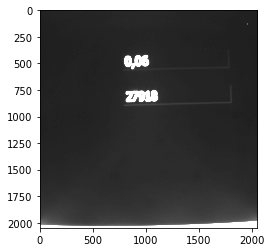

226
Midas shutdown


NameError: name 'exit' is not defined

In [2]:
"""
A simple client that registers to receive events from midas.
"""
from IPython import display

from matplotlib import pyplot as plt
import numpy as np
import os


import midas
import midas.client

if __name__ == "__main__":
    # Create our client
    client = midas.client.MidasClient("pytest")
    
    # Define which buffer we want to listen for events on (SYSTEM is the 
    # main midas buffer).
    buffer_handle = client.open_event_buffer("SYSTEM",None,1000000000)
    
    # Request events from this buffer that match certain criteria. In this
    # case we will only be told about events with an "event ID" of 14.
    request_id = client.register_event_request(buffer_handle, event_id = 1)
    
    while True:
        try:
            # If there's an event ready, `event` will contain a `midas.event.Event`
            # object. If not, it will be None. If you want to block waiting for an
            # event to arrive, you could set async_flag to False.
            event = client.receive_event(buffer_handle, async_flag=True)

            if event is not None:

                shape = int(event.banks['CAM0'].size_bytes/2**12)
                image = np.reshape(event.banks['CAM0'].data, (shape, shape))

                plt.imshow(image, cmap='gray', vmin=95, vmax=1000)

                plt.pause(1)

                print(event.banks['CAM0'].data[1000])
                # Print some information to screen about this event.
                #bank_names = ", ".join(b.name for b in event.banks)
                #print("Received event with timestamp %s containing banks %s" % (event.header.timestamp, bank_names))

            # Talk to midas so it knows we're alive, or can kill us if the user
            # pressed the "stop program" button.
            client.communicate(10)
            display.display(plt.show())
            display.clear_output()
        except KeyboardInterrupt:
            # You don't have to cancel the event request manually (it will be done
            # automatically when the program exits), but for completeness we're just
            # showing that such a function exists.
            client.deregister_event_request(buffer_handle, request_id)
            # Disconnect from midas before we exit.
            client.disconnect()
            break
        



    

                            

In [32]:
import numpy as np
np.arange(0, 2024, 10)

array([   0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        110,  120,  130,  140,  150,  160,  170,  180,  190,  200,  210,
        220,  230,  240,  250,  260,  270,  280,  290,  300,  310,  320,
        330,  340,  350,  360,  370,  380,  390,  400,  410,  420,  430,
        440,  450,  460,  470,  480,  490,  500,  510,  520,  530,  540,
        550,  560,  570,  580,  590,  600,  610,  620,  630,  640,  650,
        660,  670,  680,  690,  700,  710,  720,  730,  740,  750,  760,
        770,  780,  790,  800,  810,  820,  830,  840,  850,  860,  870,
        880,  890,  900,  910,  920,  930,  940,  950,  960,  970,  980,
        990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090,
       1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200,
       1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310,
       1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420,
       1430, 1440, 1450, 1460, 1470, 1480, 1490, 15